<a href="https://colab.research.google.com/github/Jeferson100/Artigo_cientifico/blob/main/Machine_Learning_em_consultas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1:Importação das bibliotecas

In [ ]:
import pandas as pd
from datetime import datetime 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(15,10)})

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Importacao dos algoritimos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.7.0'

In [ ]:
#Importacao dos avaliadores
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV  
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#Etapa 2: Importação dos dados

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/POS- CIENCIA DE DADOS/Metodologia de pesquisa/KaggleV2-May-2016.csv')

In [ ]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
colunas = ['id_paciente', 'id_consulta','sexo','data_agendamento','data_consulta','idade','bairro','bolsa_familia','hipertensão','diabetes','alcolismo','deficencia','sms_recebido','nao_comparecimento']

In [ ]:
data.columns = colunas

In [ ]:
data.head()

,id_paciente,id_consulta,sexo,data_agendamento,data_consulta,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,nao_comparecimento
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#Etapa 3: Divisao treino teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test= train_test_split(data,test_size = 0.30,random_state=42)

In [ ]:
train.head()

,id_paciente,id_consulta,sexo,data_agendamento,data_consulta,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,nao_comparecimento
24404,3.584540e+13,5670500,F,2016-05-06T13:54:43Z,2016-05-19T00:00:00Z,42,ESTRELINHA,0,0,0,0,0,0,No
4800,5.133544e+11,5680689,F,2016-05-10T12:24:56Z,2016-05-12T00:00:00Z,49,CONSOLAÇÃO,0,1,1,0,0,0,Yes
46410,1.865418e+11,5665065,F,2016-05-05T13:53:44Z,2016-05-10T00:00:00Z,23,MARIA ORTIZ,0,0,0,0,0,1,No
42539,9.854298e+13,5545558,F,2016-04-05T14:14:14Z,2016-05-03T00:00:00Z,0,JABOUR,0,0,0,0,0,1,No
18424,9.448438e+11,5679836,F,2016-05-10T10:34:20Z,2016-05-10T00:00:00Z,68,MARIA ORTIZ,0,0,0,0,0,0,No


In [ ]:
test.head()

,id_paciente,id_consulta,sexo,data_agendamento,data_consulta,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,nao_comparecimento
84674,2.759575e+13,5756417,F,2016-06-01T08:17:04Z,2016-06-01T00:00:00Z,20,ILHA DAS CAIEIRAS,0,0,0,0,0,0,No
3635,9.673194e+14,5523159,F,2016-03-29T16:09:39Z,2016-05-03T00:00:00Z,37,RESISTÊNCIA,0,0,0,0,0,1,No
16605,3.951641e+12,5693080,F,2016-05-12T17:33:56Z,2016-05-20T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,0,Yes
103942,9.173245e+14,5654129,F,2016-05-03T13:54:51Z,2016-06-03T00:00:00Z,24,SANTO ANDRÉ,0,0,0,0,0,1,Yes
274,3.995366e+12,5641070,F,2016-04-29T12:16:28Z,2016-04-29T00:00:00Z,41,MARIA ORTIZ,0,0,0,0,0,0,No


In [ ]:
test.shape

(33159, 14)

In [ ]:
train.shape

(77368, 14)

In [ ]:
data['nao_comparecimento'].value_counts()

No     88208
Yes    22319
Name: nao_comparecimento, dtype: int64

# Etapa 4:Tratando os dados

## TRATANDO AS COLUNAS DE TREINO

###Criando uma coluna dias da semana


In [ ]:
from datetime import datetime

In [ ]:
d = {0:'Segunda',1:'Terca',2:'Quarta',3:'Quinta',4:'Sexta',5:'Sabado',6:'Domingo'}
train['data_consulta'] = train['data_consulta'].map(lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ"))
train['data_agendamento'] = train['data_agendamento'].map(lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ"))


train['Dia_da_consulta'] = train['data_consulta'].map(lambda x: x.weekday())
train['Dia_da_consulta']= train['Dia_da_consulta'].replace(d)
train['Marcação_da_consulta'] = train['data_agendamento'].map(lambda x: x.weekday())
train['Marcação_da_consulta']  = train['Marcação_da_consulta'].replace(d)

###Crido a coluna tempo de espera entre consulta 

In [ ]:
train.data_consulta = train['data_consulta'].astype(np.datetime64)
train['data_agendamento'] = train['data_agendamento'].astype(np.datetime64)

In [ ]:
def absolute_and_round(number):
  number = abs(number)
  return int(np.ceil(number))
  
dias_consulta = train.data_consulta - train.data_agendamento
dias_consulta = dias_consulta.apply(lambda x: x.total_seconds() / (3600 * 24))
print(dias_consulta.apply(absolute_and_round))
dias_consulta = dias_consulta.apply(absolute_and_round)

24404     13
4800       2
46410      5
42539     28
18424      1
          ..
76820      5
110268    36
103694     6
860        1
15795     12
Length: 77368, dtype: int64


In [ ]:
train['dias_consulta'] = dias_consulta

In [ ]:
train.head()

,id_paciente,id_consulta,sexo,data_agendamento,data_consulta,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,nao_comparecimento,Dia_da_consulta,Marcação_da_consulta,dias_consulta
24404,3.584540e+13,5670500,F,2016-05-06 13:54:43,2016-05-19,42,ESTRELINHA,0,0,0,0,0,0,No,Quinta,Sexta,13
4800,5.133544e+11,5680689,F,2016-05-10 12:24:56,2016-05-12,49,CONSOLAÇÃO,0,1,1,0,0,0,Yes,Quinta,Terca,2
46410,1.865418e+11,5665065,F,2016-05-05 13:53:44,2016-05-10,23,MARIA ORTIZ,0,0,0,0,0,1,No,Terca,Quinta,5
42539,9.854298e+13,5545558,F,2016-04-05 14:14:14,2016-05-03,0,JABOUR,0,0,0,0,0,1,No,Terca,Terca,28
18424,9.448438e+11,5679836,F,2016-05-10 10:34:20,2016-05-10,68,MARIA ORTIZ,0,0,0,0,0,0,No,Terca,Terca,1


In [ ]:
def zone_awaiting(days):
  if days <= 5:
    return 'Rapido'
  elif days > 5 and days <= 15:
    return  'Media'
  elif days > 15 and days <= 60:
    return 'Demorada'
  else: 
    return 'Muito demorada'

In [ ]:
train['Tempo_de_espera'] =train.dias_consulta.apply(zone_awaiting)


In [ ]:
train

,id_paciente,id_consulta,sexo,data_agendamento,data_consulta,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,nao_comparecimento,Dia_da_consulta,Marcação_da_consulta,dias_consulta,Tempo_de_espera
24404,3.584540e+13,5670500,F,2016-05-06 13:54:43,2016-05-19,42,ESTRELINHA,0,0,0,0,0,0,No,Quinta,Sexta,13,Media
4800,5.133544e+11,5680689,F,2016-05-10 12:24:56,2016-05-12,49,CONSOLAÇÃO,0,1,1,0,0,0,Yes,Quinta,Terca,2,Rapido
46410,1.865418e+11,5665065,F,2016-05-05 13:53:44,2016-05-10,23,MARIA ORTIZ,0,0,0,0,0,1,No,Terca,Quinta,5,Rapido
42539,9.854298e+13,5545558,F,2016-04-05 14:14:14,2016-05-03,0,JABOUR,0,0,0,0,0,1,No,Terca,Terca,28,Demorada
18424,9.448438e+11,5679836,F,2016-05-10 10:34:20,2016-05-10,68,MARIA ORTIZ,0,0,0,0,0,0,No,Terca,Terca,1,Rapido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,4.876245e+11,5664593,F,2016-05-05 12:58:06,2016-05-10,63,SÃO PEDRO,0,1,1,0,0,1,No,Terca,Quinta,5,Rapido
110268,3.911649e+12,5622779,M,2016-04-26 13:03:23,2016-06-01,31,MARIA ORTIZ,0,0,0,0,0,0,No,Quarta,Terca,36,Demorada
103694,4.973443e+11,5762864,F,2016-06-02 08:16:03,2016-06-08,38,ANDORINHAS,0,0,0,0,0,0,No,Quarta,Quinta,6,Media
860,2.623493e+14,5639951,F,2016-04-29 09:52:19,2016-04-29,18,MARUÍPE,1,0,0,0,0,0,No,Sexta,Sexta,1,Rapido


In [ ]:
train.drop('dias_consulta',axis=1,inplace=True)


###Trasnsformando a coluna sexo

In [ ]:
train['sexo'] = np.where(train['sexo'] =='M',1,0)

In [ ]:
train.head()

,id_paciente,id_consulta,sexo,data_agendamento,data_consulta,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,nao_comparecimento,Dia_da_consulta,Marcação_da_consulta,Tempo_de_espera
24404,3.584540e+13,5670500,0,2016-05-06 13:54:43,2016-05-19,42,ESTRELINHA,0,0,0,0,0,0,No,Quinta,Sexta,Media
4800,5.133544e+11,5680689,0,2016-05-10 12:24:56,2016-05-12,49,CONSOLAÇÃO,0,1,1,0,0,0,Yes,Quinta,Terca,Rapido
46410,1.865418e+11,5665065,0,2016-05-05 13:53:44,2016-05-10,23,MARIA ORTIZ,0,0,0,0,0,1,No,Terca,Quinta,Rapido
42539,9.854298e+13,5545558,0,2016-04-05 14:14:14,2016-05-03,0,JABOUR,0,0,0,0,0,1,No,Terca,Terca,Demorada
18424,9.448438e+11,5679836,0,2016-05-10 10:34:20,2016-05-10,68,MARIA ORTIZ,0,0,0,0,0,0,No,Terca,Terca,Rapido


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77368 entries, 24404 to 15795
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_paciente           77368 non-null  float64       
 1   id_consulta           77368 non-null  int64         
 2   sexo                  77368 non-null  int64         
 3   data_agendamento      77368 non-null  datetime64[ns]
 4   data_consulta         77368 non-null  datetime64[ns]
 5   idade                 77368 non-null  int64         
 6   bairro                77368 non-null  object        
 7   bolsa_familia         77368 non-null  int64         
 8   hipertensão           77368 non-null  int64         
 9   diabetes              77368 non-null  int64         
 10  alcolismo             77368 non-null  int64         
 11  deficencia            77368 non-null  int64         
 12  sms_recebido          77368 non-null  int64         
 13  nao_comparec

### Transformando a coluna nao comparecimento

In [ ]:
train['nao_comparecimento'] = np.where(train['nao_comparecimento']=='Yes',1,0)

In [ ]:
train['nao_comparecimento'].value_counts()

0    61683
1    15685
Name: nao_comparecimento, dtype: int64

In [ ]:
train.head()

,id_paciente,id_consulta,sexo,data_agendamento,data_consulta,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,nao_comparecimento,Dia_da_consulta,Marcação_da_consulta,Tempo_de_espera
24404,3.584540e+13,5670500,0,2016-05-06 13:54:43,2016-05-19,42,ESTRELINHA,0,0,0,0,0,0,0,Quinta,Sexta,Media
4800,5.133544e+11,5680689,0,2016-05-10 12:24:56,2016-05-12,49,CONSOLAÇÃO,0,1,1,0,0,0,1,Quinta,Terca,Rapido
46410,1.865418e+11,5665065,0,2016-05-05 13:53:44,2016-05-10,23,MARIA ORTIZ,0,0,0,0,0,1,0,Terca,Quinta,Rapido
42539,9.854298e+13,5545558,0,2016-04-05 14:14:14,2016-05-03,0,JABOUR,0,0,0,0,0,1,0,Terca,Terca,Demorada
18424,9.448438e+11,5679836,0,2016-05-10 10:34:20,2016-05-10,68,MARIA ORTIZ,0,0,0,0,0,0,0,Terca,Terca,Rapido


###Transformacao da coluna idade

In [ ]:
print(train.shape[0])
print(train[train.idade > 95].shape[0])

77368
37


In [ ]:
train = train[train.idade >= 0]

In [ ]:
def map_age(x):
  
    if x <= 12:
        return 'Crianca'
    elif x > 12 and x <= 18:
        return 'Adolescente'
    elif x >18 and x<=25:
        return 'Joven Adulto'
    elif x >25 and x<=60:
        return 'Adulto'
    else:
        return 'Idoso'

In [ ]:
train['Idade'] = train.idade.apply(map_age)

In [ ]:
train.shape

(77368, 18)

###Transformando a coluna local da consulta(bairro)

In [ ]:
y_train = train.nao_comparecimento


In [ ]:
y_train = y_train.values

In [ ]:
train.drop('nao_comparecimento',axis=1,inplace=True)

In [ ]:
train.columns

Index(['id_paciente', 'id_consulta', 'sexo', 'data_agendamento',
       'data_consulta', 'idade', 'bairro', 'bolsa_familia', 'hipertensão',
       'diabetes', 'alcolismo', 'deficencia', 'sms_recebido',
       'Dia_da_consulta', 'Marcação_da_consulta', 'Tempo_de_espera', 'Idade'],
      dtype='object')

In [ ]:
train = train[['bairro','bolsa_familia', 'hipertensão', 'diabetes',
       'alcolismo', 'deficencia', 'sms_recebido', 'Dia_da_consulta','Marcação_da_consulta',
        'Tempo_de_espera', 'sexo',
       'Idade']]

In [ ]:
train.shape

(77368, 12)

In [ ]:
coluna_cat = ['bairro','Dia_da_consulta','Marcação_da_consulta',
        'Tempo_de_espera','Idade']

In [ ]:
one = OneHotEncoder(handle_unknown = 'ignore') 

In [ ]:
from sklearn.compose import ColumnTransformer
col_trans = ColumnTransformer([("one_hot", one, coluna_cat)],remainder='passthrough')

In [ ]:
x_train = col_trans.fit_transform(train)


In [ ]:
x_train = x_train.toarray()

In [ ]:
x_train.shape

(77368, 109)

## TRATANDO AS COLUNAS DE Teste

###Criando uma coluna dias da semana e hora de atendimento

In [ ]:
from datetime import datetime

In [ ]:
d = {0:'Segunda',1:'Terca',2:'Quarta',3:'Quinta',4:'Sexta',5:'Sabado',6:'Domingo'}
test['data_consulta'] = test['data_consulta'].map(lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ"))
test['data_agendamento'] = test['data_agendamento'].map(lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ"))


test['Dia_da_consulta'] = test['data_consulta'].map(lambda x: x.weekday())
test['Dia_da_consulta'] = test['Dia_da_consulta'].replace(d)
test['Marcação_da_consulta'] = test['data_agendamento'].map(lambda x: x.weekday())
test['Marcação_da_consulta'] = test['Marcação_da_consulta'].replace(d)

###Crido a coluna tempo de espera entre consulta 

In [ ]:
test.data_agendamento = test['data_agendamento'].astype(np.datetime64)
test['data_consulta'] = test['data_consulta'].astype(np.datetime64)

In [ ]:
def absolute_and_round(number):
  number = abs(number)
  return int(np.ceil(number))
  
dias_consulta = test.data_consulta - test.data_agendamento
dias_consulta = dias_consulta.apply(lambda x: x.total_seconds() / (3600 * 24))
print(dias_consulta.apply(absolute_and_round))
dias_consulta = dias_consulta.apply(absolute_and_round)

84674      1
3635      35
16605      8
103942    31
274        1
          ..
104087    20
17598     29
1050      29
51751      6
51950      1
Length: 33159, dtype: int64


In [ ]:
test['dias_consulta'] = dias_consulta

In [ ]:
test.head()

,id_paciente,id_consulta,sexo,data_agendamento,data_consulta,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,nao_comparecimento,Dia_da_consulta,Marcação_da_consulta,dias_consulta
84674,2.759575e+13,5756417,F,2016-06-01 08:17:04,2016-06-01,20,ILHA DAS CAIEIRAS,0,0,0,0,0,0,No,Quarta,Quarta,1
3635,9.673194e+14,5523159,F,2016-03-29 16:09:39,2016-05-03,37,RESISTÊNCIA,0,0,0,0,0,1,No,Terca,Terca,35
16605,3.951641e+12,5693080,F,2016-05-12 17:33:56,2016-05-20,38,MARIA ORTIZ,0,0,0,0,0,0,Yes,Sexta,Quinta,8
103942,9.173245e+14,5654129,F,2016-05-03 13:54:51,2016-06-03,24,SANTO ANDRÉ,0,0,0,0,0,1,Yes,Sexta,Terca,31
274,3.995366e+12,5641070,F,2016-04-29 12:16:28,2016-04-29,41,MARIA ORTIZ,0,0,0,0,0,0,No,Sexta,Sexta,1


In [ ]:
def zone_awaiting(days):
  if days <= 5:
    return 'Rapido'
  elif days > 5 and days <= 15:
    return  'Media'
  elif days > 15 and days <= 60:
    return 'Demorada'
  else: 
    return 'Muito demorada'

In [ ]:
test['Tempo_de_espera'] =test.dias_consulta.apply(zone_awaiting)


In [ ]:
test

,id_paciente,id_consulta,sexo,data_agendamento,data_consulta,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,nao_comparecimento,Dia_da_consulta,Marcação_da_consulta,dias_consulta,Tempo_de_espera
84674,2.759575e+13,5756417,F,2016-06-01 08:17:04,2016-06-01,20,ILHA DAS CAIEIRAS,0,0,0,0,0,0,No,Quarta,Quarta,1,Rapido
3635,9.673194e+14,5523159,F,2016-03-29 16:09:39,2016-05-03,37,RESISTÊNCIA,0,0,0,0,0,1,No,Terca,Terca,35,Demorada
16605,3.951641e+12,5693080,F,2016-05-12 17:33:56,2016-05-20,38,MARIA ORTIZ,0,0,0,0,0,0,Yes,Sexta,Quinta,8,Media
103942,9.173245e+14,5654129,F,2016-05-03 13:54:51,2016-06-03,24,SANTO ANDRÉ,0,0,0,0,0,1,Yes,Sexta,Terca,31,Demorada
274,3.995366e+12,5641070,F,2016-04-29 12:16:28,2016-04-29,41,MARIA ORTIZ,0,0,0,0,0,0,No,Sexta,Sexta,1,Rapido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104087,1.438822e+14,5690867,F,2016-05-12 10:49:31,2016-06-01,35,CARATOÍRA,1,0,0,0,0,0,Yes,Quarta,Quinta,20,Demorada
17598,3.841744e+10,5599716,M,2016-04-19 09:21:15,2016-05-18,10,JESUS DE NAZARETH,0,0,0,0,0,0,Yes,Quarta,Terca,29,Demorada
1050,3.572968e+13,5533149,F,2016-03-31 13:24:56,2016-04-29,38,SANTO ANTÔNIO,0,0,0,0,0,1,No,Sexta,Quinta,29,Demorada
51751,4.618972e+12,5689334,M,2016-05-12 08:19:52,2016-05-18,44,JESUS DE NAZARETH,0,0,0,0,0,0,No,Quarta,Quinta,6,Media


In [ ]:
test.drop('dias_consulta',axis=1,inplace=True)


###Trasnsformando a coluna sexo

In [ ]:
test['sexo'] = np.where(test['sexo'] =='M',1,0)

### Transformando a coluna nao comparecimento




In [ ]:
test['nao_comparecimento'] = np.where(test['nao_comparecimento']=='Yes',1,0)

In [ ]:
test['nao_comparecimento'].value_counts()

0    26525
1     6634
Name: nao_comparecimento, dtype: int64

In [ ]:
test.head()

,id_paciente,id_consulta,sexo,data_agendamento,data_consulta,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,nao_comparecimento,Dia_da_consulta,Marcação_da_consulta,Tempo_de_espera
84674,2.759575e+13,5756417,0,2016-06-01 08:17:04,2016-06-01,20,ILHA DAS CAIEIRAS,0,0,0,0,0,0,0,Quarta,Quarta,Rapido
3635,9.673194e+14,5523159,0,2016-03-29 16:09:39,2016-05-03,37,RESISTÊNCIA,0,0,0,0,0,1,0,Terca,Terca,Demorada
16605,3.951641e+12,5693080,0,2016-05-12 17:33:56,2016-05-20,38,MARIA ORTIZ,0,0,0,0,0,0,1,Sexta,Quinta,Media
103942,9.173245e+14,5654129,0,2016-05-03 13:54:51,2016-06-03,24,SANTO ANDRÉ,0,0,0,0,0,1,1,Sexta,Terca,Demorada
274,3.995366e+12,5641070,0,2016-04-29 12:16:28,2016-04-29,41,MARIA ORTIZ,0,0,0,0,0,0,0,Sexta,Sexta,Rapido


###Transformacao da coluna idade

In [ ]:
test = test[test.idade > 0]

In [ ]:
def map_age(x):
  
    if x < 12:
        return 'Crianca'
    elif x > 12 and x < 18:
        return 'Adolescente'
    elif x>=20 and x<25:
        return 'Joven Adulto'
    elif x>=25 and x<60:
        return 'Adulto'
    else:
        return 'Idoso'

In [ ]:
test['Idade'] = test.idade.apply(map_age)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


###Transformando a coluna local da consulta(	bairro)

In [ ]:
test

,id_paciente,id_consulta,sexo,data_agendamento,data_consulta,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,nao_comparecimento,Dia_da_consulta,Marcação_da_consulta,Tempo_de_espera,Idade
84674,2.759575e+13,5756417,0,2016-06-01 08:17:04,2016-06-01,20,ILHA DAS CAIEIRAS,0,0,0,0,0,0,0,Quarta,Quarta,Rapido,Joven Adulto
3635,9.673194e+14,5523159,0,2016-03-29 16:09:39,2016-05-03,37,RESISTÊNCIA,0,0,0,0,0,1,0,Terca,Terca,Demorada,Adulto
16605,3.951641e+12,5693080,0,2016-05-12 17:33:56,2016-05-20,38,MARIA ORTIZ,0,0,0,0,0,0,1,Sexta,Quinta,Media,Adulto
103942,9.173245e+14,5654129,0,2016-05-03 13:54:51,2016-06-03,24,SANTO ANDRÉ,0,0,0,0,0,1,1,Sexta,Terca,Demorada,Joven Adulto
274,3.995366e+12,5641070,0,2016-04-29 12:16:28,2016-04-29,41,MARIA ORTIZ,0,0,0,0,0,0,0,Sexta,Sexta,Rapido,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104087,1.438822e+14,5690867,0,2016-05-12 10:49:31,2016-06-01,35,CARATOÍRA,1,0,0,0,0,0,1,Quarta,Quinta,Demorada,Adulto
17598,3.841744e+10,5599716,1,2016-04-19 09:21:15,2016-05-18,10,JESUS DE NAZARETH,0,0,0,0,0,0,1,Quarta,Terca,Demorada,Crianca
1050,3.572968e+13,5533149,0,2016-03-31 13:24:56,2016-04-29,38,SANTO ANTÔNIO,0,0,0,0,0,1,0,Sexta,Quinta,Demorada,Adulto
51751,4.618972e+12,5689334,1,2016-05-12 08:19:52,2016-05-18,44,JESUS DE NAZARETH,0,0,0,0,0,0,0,Quarta,Quinta,Media,Adulto


In [ ]:
y_test = test['nao_comparecimento'].values

In [ ]:
test.drop(['id_paciente','id_consulta','data_agendamento','data_consulta','nao_comparecimento'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test

,sexo,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,Dia_da_consulta,Marcação_da_consulta,Tempo_de_espera,Idade
84674,0,20,ILHA DAS CAIEIRAS,0,0,0,0,0,0,Quarta,Quarta,Rapido,Joven Adulto
3635,0,37,RESISTÊNCIA,0,0,0,0,0,1,Terca,Terca,Demorada,Adulto
16605,0,38,MARIA ORTIZ,0,0,0,0,0,0,Sexta,Quinta,Media,Adulto
103942,0,24,SANTO ANDRÉ,0,0,0,0,0,1,Sexta,Terca,Demorada,Joven Adulto
274,0,41,MARIA ORTIZ,0,0,0,0,0,0,Sexta,Sexta,Rapido,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104087,0,35,CARATOÍRA,1,0,0,0,0,0,Quarta,Quinta,Demorada,Adulto
17598,1,10,JESUS DE NAZARETH,0,0,0,0,0,0,Quarta,Terca,Demorada,Crianca
1050,0,38,SANTO ANTÔNIO,0,0,0,0,0,1,Sexta,Quinta,Demorada,Adulto
51751,1,44,JESUS DE NAZARETH,0,0,0,0,0,0,Quarta,Quinta,Media,Adulto


In [ ]:
test =  test[['bairro','bolsa_familia', 'hipertensão', 'diabetes',
       'alcolismo', 'deficencia', 'sms_recebido', 'Dia_da_consulta','Marcação_da_consulta',
        'Tempo_de_espera', 'sexo',
       'Idade']]

In [ ]:
test

,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,Dia_da_consulta,Marcação_da_consulta,Tempo_de_espera,sexo,Idade
84674,ILHA DAS CAIEIRAS,0,0,0,0,0,0,Quarta,Quarta,Rapido,0,Joven Adulto
3635,RESISTÊNCIA,0,0,0,0,0,1,Terca,Terca,Demorada,0,Adulto
16605,MARIA ORTIZ,0,0,0,0,0,0,Sexta,Quinta,Media,0,Adulto
103942,SANTO ANDRÉ,0,0,0,0,0,1,Sexta,Terca,Demorada,0,Joven Adulto
274,MARIA ORTIZ,0,0,0,0,0,0,Sexta,Sexta,Rapido,0,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...
104087,CARATOÍRA,1,0,0,0,0,0,Quarta,Quinta,Demorada,0,Adulto
17598,JESUS DE NAZARETH,0,0,0,0,0,0,Quarta,Terca,Demorada,1,Crianca
1050,SANTO ANTÔNIO,0,0,0,0,0,1,Sexta,Quinta,Demorada,0,Adulto
51751,JESUS DE NAZARETH,0,0,0,0,0,0,Quarta,Quinta,Media,1,Adulto


In [ ]:
x_test = col_trans.transform(test)

In [ ]:
x_test=x_test.toarray()

In [ ]:
x_test.shape

(32104, 109)

# Etapa 5: Analise dos dados

In [ ]:
data.columns

Index(['id_paciente', 'id_consulta', 'sexo', 'data_agendamento',
       'data_consulta', 'idade', 'bairro', 'bolsa_familia', 'hipertensão',
       'diabetes', 'alcolismo', 'deficencia', 'sms_recebido',
       'nao_comparecimento'],
      dtype='object')

In [ ]:
data.drop(['id_paciente','id_consulta'],axis=1,inplace=True)

In [ ]:
data_comparecimento = data.loc[data['nao_comparecimento'] == 'No']
data_nao_comparecimento = data.loc[data['nao_comparecimento'] == 'Yes']

In [ ]:
data_nao_comparecimento

,sexo,data_agendamento,data_consulta,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,nao_comparecimento
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
110484,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110492,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,1,0,0,0,0,Yes
110515,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   sexo                110527 non-null  object
 1   data_agendamento    110527 non-null  object
 2   data_consulta       110527 non-null  object
 3   idade               110527 non-null  int64 
 4   bairro              110527 non-null  object
 5   bolsa_familia       110527 non-null  int64 
 6   hipertensão         110527 non-null  int64 
 7   diabetes            110527 non-null  int64 
 8   alcolismo           110527 non-null  int64 
 9   deficencia          110527 non-null  int64 
 10  sms_recebido        110527 non-null  int64 
 11  nao_comparecimento  110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [ ]:
data.describe()

,idade,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


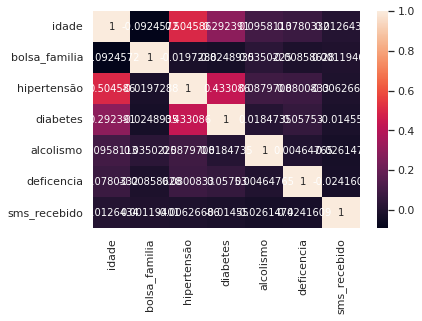

In [ ]:
sns.heatmap(data.corr(),fmt= 'g',annot=True);

In [ ]:
#sns.pairplot(data,hue= 'No-show')

In [ ]:
for i in data.columns:
  print(i)
  print(data[i].value_counts())

sexo
F    71840
M    38687
Name: sexo, dtype: int64
data_agendamento
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: data_agendamento, Length: 103549, dtype: int64
data_consulta
2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00

In [ ]:
data_nao_comparecimento.columns

Index(['sexo', 'data_agendamento', 'data_consulta', 'idade', 'bairro',
       'bolsa_familia', 'hipertensão', 'diabetes', 'alcolismo', 'deficencia',
       'sms_recebido', 'nao_comparecimento'],
      dtype='object')

In [ ]:
#coluna idade
print('nao_comparecimento')
print(data_comparecimento['idade'].value_counts()[0:5])
print('Porcentagem das idades com maiores frequencia')
print(data_comparecimento['idade'].value_counts()[0:5]/data_comparecimento.shape[0])
print('---------------------------------------------------')
print('comparecimento')
print(data_nao_comparecimento['idade'].value_counts()[0:5])
print('Porcentagem das idades com maiores frequencia')
print(data_nao_comparecimento['idade'].value_counts()[0:5]/data_nao_comparecimento.shape[0])

nao_comparecimento
0     2900
1     1858
52    1449
56    1372
2     1366
Name: idade, dtype: int64
Porcentagem das idades com maiores frequencia
0     0.032877
1     0.021064
52    0.016427
56    0.015554
2     0.015486
Name: idade, dtype: float64
---------------------------------------------------
comparecimento
0     639
1     415
17    396
19    394
30    369
Name: idade, dtype: int64
Porcentagem das idades com maiores frequencia
0     0.028630
1     0.018594
17    0.017743
19    0.017653
30    0.016533
Name: idade, dtype: float64


In [ ]:
# coluna sexo
print('nao_comparecimento')
print(data_nao_comparecimento['sexo'].value_counts())
print('Porcentagem de mulher que comparecem')
print(data_nao_comparecimento.loc[data_nao_comparecimento['sexo'] == 'F'].shape[0]/data_nao_comparecimento['sexo'].shape[0])
print('Porcentagem de homens que comparecem')
print(data_nao_comparecimento.loc[data_nao_comparecimento['sexo'] == 'M'].shape[0]/data_nao_comparecimento['sexo'].shape[0])
print('Media de idade das mulheres que nao compareceram:',data_nao_comparecimento.loc[data_nao_comparecimento['sexo'] == 'F']['idade'].mean())
print('Media de idade dos homens que nao compareceram:',data_nao_comparecimento.loc[data_nao_comparecimento['sexo'] == 'M']['idade'].mean())
print('-----------------------------------------------------------------')
print('comparecimento')
print(data_comparecimento['sexo'].value_counts())
print('Porcentagem de mulher que nao comparecem')
print(data_comparecimento.loc[data_comparecimento['sexo'] == 'F'].shape[0]/data_comparecimento['sexo'].shape[0])
print('Porcentagem de homens que nao comparecem')
print(data_comparecimento.loc[data_comparecimento['sexo'] == 'M'].shape[0]/data_comparecimento['sexo'].shape[0])
print('Media de idade das mulheres que compareceram:',data_comparecimento.loc[data_comparecimento['sexo'] == 'F']['idade'].mean())
print('Media de idade dos homens que compareceram:',data_comparecimento.loc[data_comparecimento['sexo'] == 'M']['idade'].mean())

nao_comparecimento
F    14594
M     7725
Name: sexo, dtype: int64
Porcentagem de mulher que comparecem
0.653882342398853
Porcentagem de homens que comparecem
0.346117657601147
Media de idade das mulheres que nao compareceram: 36.162189941071674
Media de idade dos homens que nao compareceram: 30.833009708737865
-----------------------------------------------------------------
comparecimento
F    57246
M    30962
Name: sexo, dtype: int64
Porcentagem de mulher que nao comparecem
0.6489887538545257
Porcentagem de homens que nao comparecem
0.35101124614547435
Media de idade das mulheres que compareceram: 39.590416797680184
Media de idade dos homens que compareceram: 34.46137200439248


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


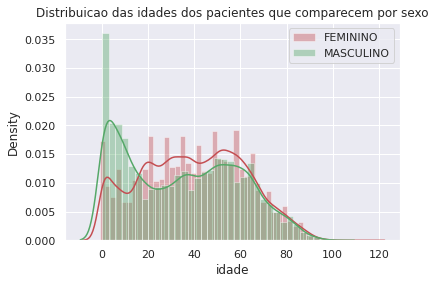

In [ ]:
sns.distplot(data_comparecimento.loc[data_comparecimento['sexo'] == 'F']['idade'],color='r',label='FEMININO');
sns.distplot(data_comparecimento.loc[data_comparecimento['sexo'] == 'M']['idade'],color='g',label='MASCULINO');
plt.title('Distribuicao das idades dos pacientes que comparecem por sexo');
plt.legend();


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


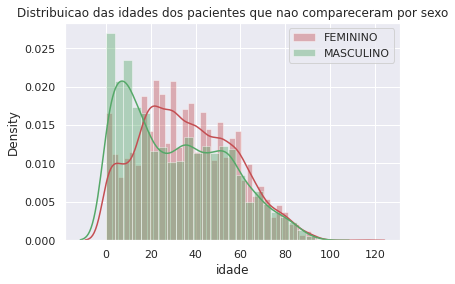

In [ ]:
sns.distplot(data_nao_comparecimento.loc[data_nao_comparecimento['sexo'] == 'F']['idade'],color='r',label='FEMININO')
sns.distplot(data_nao_comparecimento.loc[data_nao_comparecimento['sexo'] == 'M']['idade'],color='g',label='MASCULINO')
plt.title('Distribuicao das idades dos pacientes que nao compareceram por sexo');
plt.legend()

In [ ]:
##Scholarship uma variável binária que indica se o paciente é elegível a receber o bolsa família
print('nao compareceram')
print(data_nao_comparecimento['bolsa_familia'].value_counts())
print('Nao elegivel')
print(data_nao_comparecimento.loc[data_nao_comparecimento['bolsa_familia'] == 0].shape[0]/data_nao_comparecimento['bolsa_familia'].shape[0])
print('Elegivel')
print(data_nao_comparecimento.loc[data_nao_comparecimento['bolsa_familia'] == 1].shape[0]/data_nao_comparecimento['bolsa_familia'].shape[0])
print('-----------------------------------------------------------------')
print('compareceram')
print(data_comparecimento['bolsa_familia'].value_counts())
print('Nao elegivel')
print(data_comparecimento.loc[data_comparecimento['bolsa_familia'] == 0].shape[0]/data_comparecimento['bolsa_familia'].shape[0])
print('Elegivel')
print(data_comparecimento.loc[data_comparecimento['bolsa_familia'] == 1].shape[0]/data_comparecimento['bolsa_familia'].shape[0])

nao compareceram
0    19741
1     2578
Name: bolsa_familia, dtype: int64
Nao elegivel
0.8844930328419732
Elegivel
0.11550696715802679
-----------------------------------------------------------------
compareceram
0    79925
1     8283
Name: bolsa_familia, dtype: int64
Nao elegivel
0.9060969526573553
Elegivel
0.09390304734264465


In [ ]:
#Coluns hipertensao
print('no show')
print(data_nao_comparecimento['hipertensão'].value_counts())
print('Nao tem hipertensao')
print(data_nao_comparecimento.loc[data_nao_comparecimento['hipertensão'] == 0].shape[0]/data_nao_comparecimento['hipertensão'].shape[0])
print('Tem hipertensao')
print(data_nao_comparecimento.loc[data_nao_comparecimento['hipertensão'] == 1].shape[0]/data_nao_comparecimento['hipertensão'].shape[0])
print('-----------------------------------------------------------------')
print('show')
print(data_comparecimento['hipertensão'].value_counts())
print('Na tem hipertensao')
print(data_comparecimento.loc[data_comparecimento['hipertensão'] == 0].shape[0]/data_comparecimento['hipertensão'].shape[0])
print('Tem hipertensao')
print(data_comparecimento.loc[data_comparecimento['hipertensão'] == 1].shape[0]/data_comparecimento['hipertensão'].shape[0])

no show
0    18547
1     3772
Name: hipertensão, dtype: int64
Nao tem hipertensao
0.8309960123661454
Tem hipertensao
0.16900398763385457
-----------------------------------------------------------------
show
0    70179
1    18029
Name: hipertensão, dtype: int64
Na tem hipertensao
0.7956081081081081
Tem hipertensao
0.20439189189189189


In [ ]:
#Coluns diabetes
print('no show')
print(data_nao_comparecimento['diabetes'].value_counts())
print('Nao tem Diabetes')
print(data_nao_comparecimento.loc[data_nao_comparecimento['diabetes'] == 0].shape[0]/data_nao_comparecimento['diabetes'].shape[0])
print('Tem Diabetes')
print(data_nao_comparecimento.loc[data_nao_comparecimento['diabetes'] == 1].shape[0]/data_nao_comparecimento['diabetes'].shape[0])
print('-----------------------------------------------------------------')
print('show')
print(data_comparecimento['diabetes'].value_counts())
print('Nao tem Diabetes')
print(data_comparecimento.loc[data_comparecimento['diabetes'] == 0].shape[0]/data_comparecimento['diabetes'].shape[0])
print('Tem Diabetes')
print(data_comparecimento.loc[data_comparecimento['diabetes'] == 1].shape[0]/data_comparecimento['diabetes'].shape[0])

no show
0    20889
1     1430
Name: diabetes, dtype: int64
Nao tem Diabetes
0.9359290290783637
Tem Diabetes
0.06407097092163627
-----------------------------------------------------------------
show
0    81695
1     6513
Name: diabetes, dtype: int64
Nao tem Diabetes
0.9261631598040994
Tem Diabetes
0.0738368401959006


In [ ]:
#Coluns Alcoholism
print('no show')
print(data_nao_comparecimento['alcolismo'].value_counts())
print('Nao tem Alcoholism')
print(data_nao_comparecimento.loc[data_nao_comparecimento['alcolismo'] == 0].shape[0]/data_nao_comparecimento['alcolismo'].shape[0])
print('Tem Alcoholism')
print(data_nao_comparecimento.loc[data_nao_comparecimento['alcolismo'] == 1].shape[0]/data_nao_comparecimento['alcolismo'].shape[0])
print('-----------------------------------------------------------------')
print('show')
print(data_comparecimento['alcolismo'].value_counts())
print('Nao tem Alcoholism')
print(data_comparecimento.loc[data_comparecimento['alcolismo'] == 0].shape[0]/data_comparecimento['alcolismo'].shape[0])
print('Tem Alcoholism')
print(data_comparecimento.loc[data_comparecimento['alcolismo'] == 1].shape[0]/data_comparecimento['alcolismo'].shape[0])

no show
0    21642
1      677
Name: alcolismo, dtype: int64
Nao tem Alcoholism
0.9696670997804561
Tem Alcoholism
0.030332900219543886
-----------------------------------------------------------------
show
0    85525
1     2683
Name: alcolismo, dtype: int64
Nao tem Alcoholism
0.9695832577543987
Tem Alcoholism
0.030416742245601307


In [ ]:
#Coluns Handcap
print('no show')
print(data_nao_comparecimento['deficencia'].value_counts())
print('deficencia 0')
print(data_nao_comparecimento.loc[data_nao_comparecimento['deficencia'] == 0].shape[0]/data_nao_comparecimento['deficencia'].shape[0])
print('deficencia 1')
print(data_nao_comparecimento.loc[data_nao_comparecimento['deficencia'] == 1].shape[0]/data_nao_comparecimento['deficencia'].shape[0])
print('deficencia 2')
print(data_nao_comparecimento.loc[data_nao_comparecimento['deficencia'] == 2].shape[0]/data_nao_comparecimento['deficencia'].shape[0])
print('deficencia 3')
print(data_nao_comparecimento.loc[data_nao_comparecimento['deficencia'] == 3].shape[0]/data_nao_comparecimento['deficencia'].shape[0])
print('deficencia 4')
print(data_nao_comparecimento.loc[data_nao_comparecimento['deficencia'] == 4].shape[0]/data_nao_comparecimento['deficencia'].shape[0])
print('show')
print(data_comparecimento['deficencia'].value_counts())
print('deficencia 0')
print(data_comparecimento.loc[data_comparecimento['deficencia'] == 0].shape[0]/data_comparecimento['deficencia'].shape[0])
print('deficencia 1')
print(data_comparecimento.loc[data_comparecimento['deficencia'] == 1].shape[0]/data_comparecimento['deficencia'].shape[0])
print('deficencia 2')
print(data_comparecimento.loc[data_comparecimento['deficencia'] == 2].shape[0]/data_comparecimento['deficencia'].shape[0])
print('deficencia 3')
print(data_comparecimento.loc[data_comparecimento['deficencia'] == 3].shape[0]/data_comparecimento['deficencia'].shape[0])
print('deficencia 4')
print(data_comparecimento.loc[data_comparecimento['deficencia'] == 4].shape[0]/data_comparecimento['deficencia'].shape[0])

no show
0    21912
1      366
2       37
3        3
4        1
Name: deficencia, dtype: int64
deficencia 0
0.9817644159684573
deficencia 1
0.016398584165957256
deficencia 2
0.0016577803665038756
deficencia 3
0.00013441462431112506
deficencia 4
4.480487477037502e-05
show
0    86374
1     1676
2      146
3       10
4        2
Name: deficencia, dtype: int64
deficencia 0
0.9792082350807183
deficencia 1
0.019000544168329404
deficencia 2
0.0016551786686014873
deficencia 3
0.00011336840195900599
deficencia 4
2.2673680391801197e-05


In [ ]:
#Coluns_received sms
print('no show')
print(data_nao_comparecimento['sms_recebido'].value_counts())
print('Nao SMS_received')
print(data_nao_comparecimento.loc[data_nao_comparecimento['sms_recebido'] == 0].shape[0]/data_nao_comparecimento['sms_recebido'].shape[0])
print('SMS_received')
print(data_nao_comparecimento.loc[data_nao_comparecimento['sms_recebido'] == 1].shape[0]/data_nao_comparecimento['sms_recebido'].shape[0])
print('Nao SMS_received')
print(data_comparecimento.loc[data_comparecimento['sms_recebido'] == 0].shape[0]/data_comparecimento['sms_recebido'].shape[0])
print('SMS_received')
print(data_comparecimento.loc[data_comparecimento['sms_recebido'] == 1].shape[0]/data_comparecimento['sms_recebido'].shape[0])

no show
0    12535
1     9784
Name: sms_recebido, dtype: int64
Nao SMS_received
0.5616291052466509
SMS_received
0.43837089475334917
Nao SMS_received
0.7086658806457464
SMS_received
0.2913341193542536


In [ ]:
data_comparecimento.columns

Index(['sexo', 'data_agendamento', 'data_consulta', 'idade', 'bairro',
       'bolsa_familia', 'hipertensão', 'diabetes', 'alcolismo', 'deficencia',
       'sms_recebido', 'nao_comparecimento'],
      dtype='object')

In [ ]:
##Coluna dias da semana show
d = {0:'Segunda',1:'Terca',2:'Quarta',3:'Quinta',4:'Sexta',5:'Sabado',6:'Domingo'}
data_comparecimento['data_consulta'] = data_comparecimento['data_consulta'].map(lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ"))
data_comparecimento['data_agendamento'] = data_comparecimento['data_agendamento'].map(lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ"))


data_comparecimento['Dia_da_consulta'] = data_comparecimento['data_consulta'].map(lambda x: x.weekday())
data_comparecimento['Dia_da_consulta'] = data_comparecimento['Dia_da_consulta'].replace(d)
data_comparecimento['Marcação_da_consulta'] = data_comparecimento['data_agendamento'].map(lambda x: x.weekday())
data_comparecimento['Marcação_da_consulta'] = data_comparecimento['Marcação_da_consulta'].replace(d)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
##Coluna dias da semana no show
d = {0:'Segunda',1:'Terca',2:'Quarta',3:'Quinta',4:'Sexta',5:'Sabado',6:'Domingo'}
data_nao_comparecimento['data_consulta'] = data_nao_comparecimento['data_consulta'].map(lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ"))
data_nao_comparecimento['data_agendamento'] = data_nao_comparecimento['data_agendamento'].map(lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%SZ"))


data_nao_comparecimento['Dia_da_consulta'] = data_nao_comparecimento['data_consulta'].map(lambda x: x.weekday())
data_nao_comparecimento['Dia_da_consulta'] = data_nao_comparecimento['Dia_da_consulta'].replace(d)
data_nao_comparecimento['Marcação_da_consulta'] = data_nao_comparecimento['data_agendamento'].map(lambda x: x.weekday())
data_nao_comparecimento['Marcação_da_consulta'] = data_nao_comparecimento['Marcação_da_consulta'].replace(d)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
data_comparecimento.loc[data_comparecimento['Dia_da_consulta'] == 'Sabado']

,sexo,data_agendamento,data_consulta,idade,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,nao_comparecimento,Dia_da_consulta,Marcação_da_consulta
72295,F,2016-05-02 13:08:18,2016-05-14,60,SANTO ANTÔNIO,0,0,0,0,0,1,No,Sabado,Segunda
72297,F,2016-05-06 09:35:30,2016-05-14,27,CARATOÍRA,1,0,0,0,0,1,No,Sabado,Sexta
72298,M,2016-05-02 12:02:42,2016-05-14,75,CARATOÍRA,0,1,1,0,0,0,No,Sabado,Segunda
72299,F,2016-05-09 08:50:55,2016-05-14,67,CARATOÍRA,0,0,0,0,0,1,No,Sabado,Segunda
72300,F,2016-05-09 11:04:56,2016-05-14,72,CARATOÍRA,0,1,1,0,0,1,No,Sabado,Segunda
72301,M,2016-05-09 11:05:15,2016-05-14,52,CARATOÍRA,0,0,1,0,0,1,No,Sabado,Segunda
72302,M,2016-05-02 10:49:40,2016-05-14,31,ARIOVALDO FAVALESSA,0,0,0,0,1,1,No,Sabado,Segunda
72303,F,2016-05-02 10:49:54,2016-05-14,52,ARIOVALDO FAVALESSA,0,0,0,0,0,0,No,Sabado,Segunda
72304,F,2016-05-10 09:06:06,2016-05-14,58,CARATOÍRA,0,0,0,0,0,1,No,Sabado,Terca
72305,F,2016-05-14 07:52:21,2016-05-14,34,CARATOÍRA,1,0,0,0,0,0,No,Sabado,Sabado


In [ ]:
## dia de semana que foi a da consulta 
print('show')
print(data_comparecimento['Dia_da_consulta'].value_counts())
print('Monday')
print(data_comparecimento.loc[data_comparecimento['Dia_da_consulta'] == 'Segunda'].shape[0]/data_comparecimento['Dia_da_consulta'].shape[0])
print('Tuesday')
print(data_comparecimento.loc[data_comparecimento['Dia_da_consulta'] =='Terca'].shape[0]/data_comparecimento['Dia_da_consulta'].shape[0])
print('Wednesday')
print(data_comparecimento.loc[data_comparecimento['Dia_da_consulta'] == 'Quarta'].shape[0]/data_comparecimento['Dia_da_consulta'].shape[0])
print('Thursday')
print(data_comparecimento.loc[data_comparecimento['Dia_da_consulta'] == 'Quinta'].shape[0]/data_comparecimento['Dia_da_consulta'].shape[0])
print('Friday')
print(data_comparecimento.loc[data_comparecimento['Dia_da_consulta'] == 'Sexta'].shape[0]/data_comparecimento['Dia_da_consulta'].shape[0])
print('Saturday')
print(data_comparecimento.loc[data_comparecimento['Dia_da_consulta'] == 'Sabado'].shape[0]/data_comparecimento['Dia_da_consulta'].shape[0])
print('Sunday')
print(data_comparecimento.loc[data_comparecimento['Dia_da_consulta'] == 'Domingo'].shape[0]/data_comparecimento['Dia_da_consulta'].shape[0])
print('------------------------------------------------------------------------------------------------------------')
print('no show')
print(data_nao_comparecimento['Dia_da_consulta'].value_counts())
print('Monday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Dia_da_consulta'] == 'Segunda'].shape[0]/data_nao_comparecimento['Dia_da_consulta'].shape[0])
print('Tuesday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Dia_da_consulta'] =='Terca'].shape[0]/data_nao_comparecimento['Dia_da_consulta'].shape[0])
print('Wednesday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Dia_da_consulta'] == 'Quarta'].shape[0]/data_nao_comparecimento['Dia_da_consulta'].shape[0])
print('Thursday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Dia_da_consulta'] == 'Quinta'].shape[0]/data_nao_comparecimento['Dia_da_consulta'].shape[0])
print('Friday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Dia_da_consulta'] == 'Sexta'].shape[0]/data_nao_comparecimento['Dia_da_consulta'].shape[0])
print('Saturday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Dia_da_consulta'] == 'Sabado'].shape[0]/data_nao_comparecimento['Dia_da_consulta'].shape[0])
print('Sunday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Dia_da_consulta'] == 'Domingo'].shape[0]/data_nao_comparecimento['Dia_da_consulta'].shape[0])


show
Quarta     20774
Terca      20488
Segunda    18025
Sexta      14982
Quinta     13909
Sabado        30
Name: Dia_da_consulta, dtype: int64
Monday
0.2043465445311083
Tuesday
0.23226918193361146
Wednesday
0.23551151822963903
Thursday
0.15768411028478144
Friday
0.16984853981498277
Saturday
0.00034010520587701796
Sunday
0.0
------------------------------------------------------------------------------------------------------------
no show
Terca      5152
Quarta     5093
Segunda    4690
Sexta      4037
Quinta     3338
Sabado        9
Name: Dia_da_consulta, dtype: int64
Monday
0.21013486267305884
Tuesday
0.2308347148169721
Wednesday
0.22819122720551996
Thursday
0.1495586719835118
Friday
0.18087727944800394
Saturday
0.0004032438729333752
Sunday
0.0


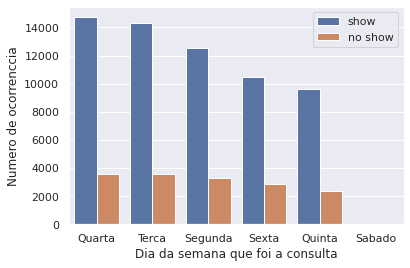

In [ ]:
sns.countplot(data=train, x='Dia_da_consulta', order=train.Dia_da_consulta.value_counts().index,hue=y_train)
plt.xlabel('Dia da semana que foi a consulta')
plt.ylabel('Numero de ocorrenccia')
plt.legend(['show','no show'])

In [ ]:
train.Dia_da_consulta.unique()

array(['Quinta', 'Terca', 'Segunda', 'Sexta', 'Quarta', 'Sabado'],
      dtype=object)

In [ ]:
## dia de semana que foi marcada a consulta 
print('show')
print(data_comparecimento['Marcação_da_consulta'].value_counts())
print('Monday')
print(data_comparecimento.loc[data_comparecimento['Marcação_da_consulta'] == 'Segunda'].shape[0]/data_comparecimento['Marcação_da_consulta'].shape[0])
print('Tuesday')
print(data_comparecimento.loc[data_comparecimento['Marcação_da_consulta'] =='Terca'].shape[0]/data_comparecimento['Marcação_da_consulta'].shape[0])
print('Wednesday')
print(data_comparecimento.loc[data_comparecimento['Marcação_da_consulta'] == 'Quarta'].shape[0]/data_comparecimento['Marcação_da_consulta'].shape[0])
print('Thursday')
print(data_comparecimento.loc[data_comparecimento['Marcação_da_consulta'] == 'Quinta'].shape[0]/data_comparecimento['Marcação_da_consulta'].shape[0])
print('Friday')
print(data_comparecimento.loc[data_comparecimento['Marcação_da_consulta'] == 'Sexta'].shape[0]/data_comparecimento['Marcação_da_consulta'].shape[0])
print('Saturday')
print(data_comparecimento.loc[data_comparecimento['Marcação_da_consulta'] == 'Sabado'].shape[0]/data_comparecimento['Marcação_da_consulta'].shape[0])
print('Sunday')
print(data_comparecimento.loc[data_comparecimento['Marcação_da_consulta'] == 'Domingo'].shape[0]/data_comparecimento['Marcação_da_consulta'].shape[0])
print('------------------------------------------------------------------------------------------------------------')
print('no show')
print(data_nao_comparecimento['Marcação_da_consulta'].value_counts())
print('Monday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Marcação_da_consulta'] == 'Segunda'].shape[0]/data_nao_comparecimento['Marcação_da_consulta'].shape[0])
print('Tuesday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Marcação_da_consulta'] =='Terca'].shape[0]/data_nao_comparecimento['Marcação_da_consulta'].shape[0])
print('Wednesday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Marcação_da_consulta'] == 'Quarta'].shape[0]/data_nao_comparecimento['Marcação_da_consulta'].shape[0])
print('Thursday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Marcação_da_consulta'] == 'Quinta'].shape[0]/data_nao_comparecimento['Marcação_da_consulta'].shape[0])
print('Friday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Marcação_da_consulta'] == 'Sexta'].shape[0]/data_nao_comparecimento['Marcação_da_consulta'].shape[0])
print('Saturday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Marcação_da_consulta'] == 'Sabado'].shape[0]/data_nao_comparecimento['Marcação_da_consulta'].shape[0])
print('Sunday')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Marcação_da_consulta'] == 'Domingo'].shape[0]/data_nao_comparecimento['Marcação_da_consulta'].shape[0])


show
Terca      20877
Quarta     19383
Segunda    18524
Sexta      15028
Quinta     14373
Sabado        23
Name: Marcação_da_consulta, dtype: int64
Monday
0.2100036277888627
Tuesday
0.2366792127698168
Wednesday
0.2197419735171413
Thursday
0.16294440413567932
Friday
0.1703700344639942
Saturday
0.0002607473245057138
Sunday
0.0
------------------------------------------------------------------------------------------------------------
no show
Terca      5291
Quarta     4879
Segunda    4561
Sexta      3887
Quinta     3700
Sabado        1
Name: Marcação_da_consulta, dtype: int64
Monday
0.20435503382768044
Tuesday
0.2370625924100542
Wednesday
0.21860298400465972
Thursday
0.16577803665038757
Friday
0.1741565482324477
Saturday
4.480487477037502e-05
Sunday
0.0


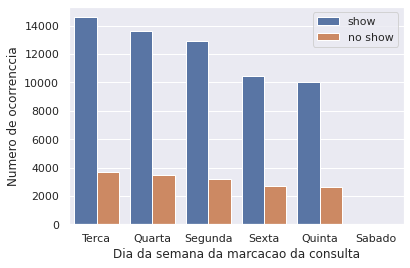

In [ ]:
sns.countplot(data=train, x='Marcação_da_consulta', order=train.Marcação_da_consulta.value_counts().index,hue=y_train)
plt.xlabel('Dia da semana da marcacao da consulta')
plt.ylabel('Numero de ocorrenccia')
plt.legend(['show','no show'])

In [ ]:
## CRIANDO COLUNA TEMPO DE ESPERA EM NO SHOW
def absolute_and_round(number):
  number = abs(number)
  return int(np.ceil(number))
  
dias_consulta = data_nao_comparecimento.data_consulta - data_nao_comparecimento.data_agendamento
dias_consulta = dias_consulta.apply(lambda x: x.total_seconds() / (3600 * 24))
print(dias_consulta.apply(absolute_and_round))
dias_consulta = dias_consulta.apply(absolute_and_round)
data_nao_comparecimento['dias_consulta'] = dias_consulta
data_nao_comparecimento['Tempo_de_espera'] =data_nao_comparecimento.dias_consulta.apply(zone_awaiting)

6         2
7         2
11        3
17        1
20        2
         ..
110484    4
110492    1
110496    2
110515    2
110516    1
Length: 22319, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
## CRIANDO COLUNA TEMPO DE ESPERA EM SHOW
def absolute_and_round(number):
  number = abs(number)
  return int(np.ceil(number))
  
dias_consulta = data_comparecimento.data_consulta - data_comparecimento.data_agendamento
dias_consulta = dias_consulta.apply(lambda x: x.total_seconds() / (3600 * 24))
print(dias_consulta.apply(absolute_and_round))
dias_consulta = dias_consulta.apply(absolute_and_round)
data_comparecimento['dias_consulta'] = dias_consulta
data_comparecimento['Tempo_de_espera'] =data_comparecimento.dias_consulta.apply(zone_awaiting)

0          1
1          1
2          1
3          1
4          1
          ..
110522    35
110523    35
110524    41
110525    41
110526    41
Length: 88208, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
## Coluna dia tempo de espera 
print('show')
print(data_comparecimento['Tempo_de_espera'].value_counts())
print('Demorada')
print(data_comparecimento.loc[data_comparecimento['Tempo_de_espera'] == 'Demorada'].shape[0]/data_comparecimento['Tempo_de_espera'].shape[0])
print('Rapido')
print(data_comparecimento.loc[data_comparecimento['Tempo_de_espera'] == 'Rapido'].shape[0]/data_comparecimento['Tempo_de_espera'].shape[0])
print('Media')
print(data_comparecimento.loc[data_comparecimento['Tempo_de_espera'] == 'Media'].shape[0]/data_comparecimento['Tempo_de_espera'].shape[0])
print('Muito demorada')
print(data_comparecimento.loc[data_comparecimento['Tempo_de_espera'] == 'Muito demorada'].shape[0]/data_comparecimento['Tempo_de_espera'].shape[0])
print('------------------------------------------------------------------------------------------------------------')
print('no show')
print(data_nao_comparecimento['Tempo_de_espera'].value_counts())
print('Demorada')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Tempo_de_espera'] == 'Demorada'].shape[0]/data_nao_comparecimento['Tempo_de_espera'].shape[0])
print('Rapido')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Tempo_de_espera'] =='Rapido'].shape[0]/data_nao_comparecimento['Tempo_de_espera'].shape[0])
print('Media')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Tempo_de_espera'] == 'Media'].shape[0]/data_nao_comparecimento['Tempo_de_espera'].shape[0])
print('Muito demorada')
print(data_nao_comparecimento.loc[data_nao_comparecimento['Tempo_de_espera'] == 'Muito demorada'].shape[0]/data_nao_comparecimento['Tempo_de_espera'].shape[0])



show
Rapido            54551
Demorada          16163
Media             15995
Muito demorada     1499
Name: Tempo_de_espera, dtype: int64
Demorada
0.18323734808634137
Rapido
0.6184359695265735
Media
0.18133275893343007
Muito demorada
0.016993923453654997
------------------------------------------------------------------------------------------------------------
no show
Demorada          7988
Rapido            7258
Media             6477
Muito demorada     596
Name: Tempo_de_espera, dtype: int64
Demorada
0.35790133966575566
Rapido
0.32519378108338187
Media
0.290201173887719
Muito demorada
0.02670370536314351


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


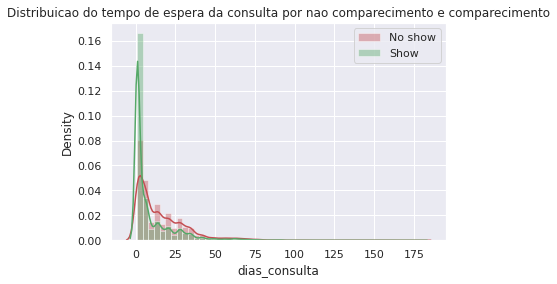

In [ ]:
sns.distplot(data_nao_comparecimento.dias_consulta,color='r',label='No show')
sns.distplot(data_comparecimento.dias_consulta,color='g',label='Show')
plt.title('Distribuicao do tempo de espera da consulta por nao comparecimento e comparecimento');
plt.legend()


In [ ]:
uniao=pd.concat([data_nao_comparecimento,data_comparecimento])

In [ ]:
print('Tempo medio de espera para a consulta:',uniao.dias_consulta.mean())
print('Desvio padrao do Tempo espera para a consulta:',uniao.dias_consulta.std())
print('Tempo medio de espera para a consulta nos pacientes faltantes:',data_nao_comparecimento.dias_consulta.mean())
print('Desvio padrao do Tempo espera para a consulta nos pacientes faltantes:',data_nao_comparecimento.dias_consulta.std())
print('Tempo medio de espera para a consulta dos que compareceram:',data_comparecimento.dias_consulta.mean())
print('Desvio padrao do Tempo espera para a consulta dos que compareceram:',data_comparecimento.dias_consulta.std())

Tempo medio de espera para a consulta: 10.532829082486632
Desvio padrao do Tempo espera para a consulta: 15.027683358387575
Tempo medio de espera para a consulta nos pacientes faltantes: 15.912899323446391
Desvio padrao do Tempo espera para a consulta nos pacientes faltantes: 16.53037443015687
Tempo medio de espera para a consulta dos que compareceram: 9.171526392163976
Desvio padrao do Tempo espera para a consulta dos que compareceram: 14.305873949972979


In [ ]:

sns.set_style('white')

In [ ]:
uniao.columns

Index(['sexo', 'data_agendamento', 'data_consulta', 'idade', 'bairro',
       'bolsa_familia', 'hipertensão', 'diabetes', 'alcolismo', 'deficencia',
       'sms_recebido', 'nao_comparecimento', 'Dia_da_consulta',
       'Marcação_da_consulta', 'dias_consulta', 'Tempo_de_espera'],
      dtype='object')

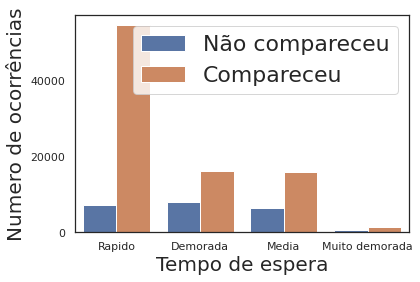

In [ ]:
sns.countplot(data=uniao, x='Tempo_de_espera', order=uniao.Tempo_de_espera.value_counts().index,hue=uniao['nao_comparecimento'])
plt.ylabel('Numero de ocorrências',fontsize=20)
plt.xlabel('Tempo de espera',fontsize=20)
sns.set(font_scale = 2)
sns.set_style('white')
plt.legend(['Não compareceu','Compareceu']);
plt.savefig('tempo_espera.png', format='png')

Text(0.5, 1.0, 'Tempo de espera entre a marcaçâo da colsulta e a consulta para pacientes que não compareceram')

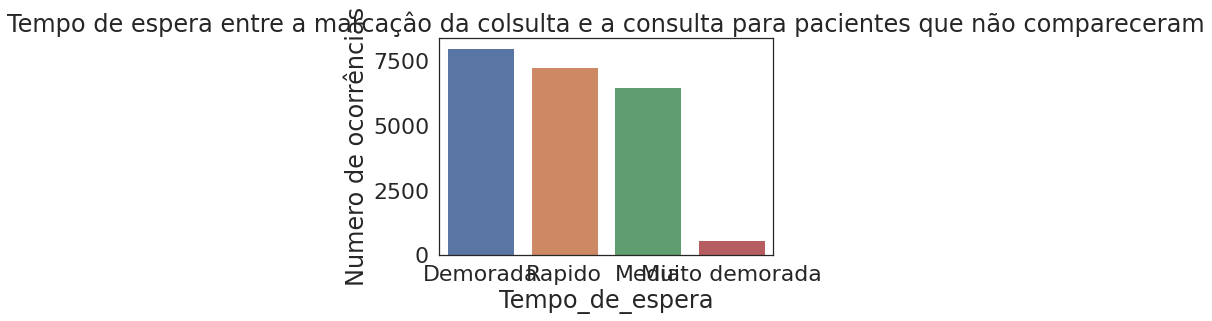

In [ ]:
sns.countplot(data=data_nao_comparecimento, x='Tempo_de_espera', order=data_nao_comparecimento.Tempo_de_espera.value_counts().index)
plt.ylabel('Numero de ocorrências')
plt.title('Tempo de espera entre a marcaçâo da colsulta e a consulta para pacientes que não compareceram')


Text(0.5, 1.0, 'Tempo de espera entre a marcaçâo da colsulta e a consulta para pacientes que compareceram')

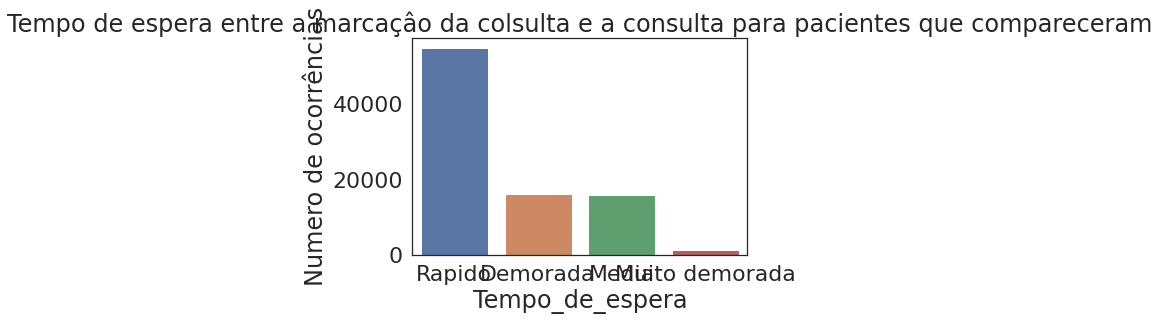

In [ ]:
sns.countplot(data=data_comparecimento, x='Tempo_de_espera', order=data_comparecimento.Tempo_de_espera.value_counts().index)
plt.ylabel('Numero de ocorrências')
plt.title('Tempo de espera entre a marcaçâo da colsulta e a consulta para pacientes que compareceram')


##Importancia das caracteristicas

In [ ]:
train.head()

,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,Dia_da_consulta,Marcação_da_consulta,Tempo_de_espera,sexo,Idade
24404,ESTRELINHA,0,0,0,0,0,0,Quinta,Sexta,Media,0,Adulto
4800,CONSOLAÇÃO,0,1,1,0,0,0,Quinta,Terca,Rapido,0,Adulto
46410,MARIA ORTIZ,0,0,0,0,0,1,Terca,Quinta,Rapido,0,Joven Adulto
42539,JABOUR,0,0,0,0,0,1,Terca,Terca,Demorada,0,Crianca
18424,MARIA ORTIZ,0,0,0,0,0,0,Terca,Terca,Rapido,0,Idoso


In [ ]:
importancia = train.copy(deep=True)

In [ ]:
importancia

,bairro,bolsa_familia,hipertensão,diabetes,alcolismo,deficencia,sms_recebido,Dia_da_consulta,Marcação_da_consulta,Tempo_de_espera,sexo,Idade
24404,ESTRELINHA,0,0,0,0,0,0,Quinta,Sexta,Media,0,Adulto
4800,CONSOLAÇÃO,0,1,1,0,0,0,Quinta,Terca,Rapido,0,Adulto
46410,MARIA ORTIZ,0,0,0,0,0,1,Terca,Quinta,Rapido,0,Joven Adulto
42539,JABOUR,0,0,0,0,0,1,Terca,Terca,Demorada,0,Crianca
18424,MARIA ORTIZ,0,0,0,0,0,0,Terca,Terca,Rapido,0,Idoso
...,...,...,...,...,...,...,...,...,...,...,...,...
76820,SÃO PEDRO,0,1,1,0,0,1,Terca,Quinta,Rapido,0,Idoso
110268,MARIA ORTIZ,0,0,0,0,0,0,Quarta,Terca,Demorada,1,Adulto
103694,ANDORINHAS,0,0,0,0,0,0,Quarta,Quinta,Media,0,Adulto
860,MARUÍPE,1,0,0,0,0,0,Sexta,Sexta,Rapido,0,Adolescente


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_ne = LabelEncoder()
label_ap = LabelEncoder()
label_sc = LabelEncoder()
label_zo = LabelEncoder()
label_age = LabelEncoder()


In [ ]:
importancia['bairro'] = label_ne.fit_transform(train['bairro'])
importancia['Dia_da_consulta'] = label_ap.fit_transform(train['Dia_da_consulta'])
importancia['Marcação_da_consulta'] = label_sc.fit_transform(train['Marcação_da_consulta'])
importancia['Tempo_de_espera'] = label_zo.fit_transform(train['Tempo_de_espera'])
importancia['Idade'] = label_age.fit_transform(train['Idade'])


In [ ]:
model  = DecisionTreeClassifier(random_state=42,criterion='entropy')
model.fit(importancia, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
importances = pd.Series(data=model.feature_importances_, index=importancia.columns).sort_values(ascending=False)

In [ ]:
importances

bairro                  0.355723
Marcação_da_consulta    0.159664
Dia_da_consulta         0.124911
Tempo_de_espera         0.100438
sexo                    0.068547
Idade                   0.064553
hipertensão             0.035844
diabetes                0.025734
bolsa_familia           0.022643
deficencia              0.015278
alcolismo               0.015091
sms_recebido            0.011575
dtype: float64

In [ ]:
importancia.columns

Index(['bairro', 'bolsa_familia', 'hipertensão', 'diabetes', 'alcolismo',
       'deficencia', 'sms_recebido', 'Dia_da_consulta', 'Marcação_da_consulta',
       'Tempo_de_espera', 'sexo', 'Idade'],
      dtype='object')

In [ ]:
importances = pd.Series(data=model.feature_importances_, index=['Bairro','Bolsa familia', 'Hipertensão', 'Diabetes',
       'Alcoolismo', 'Deficiência', 'SMS recebido', 'Dia da consulta','Marcação da consulta',
        'Tempo de espera', 'Sexo',
       'Idade']).sort_values(ascending=False)

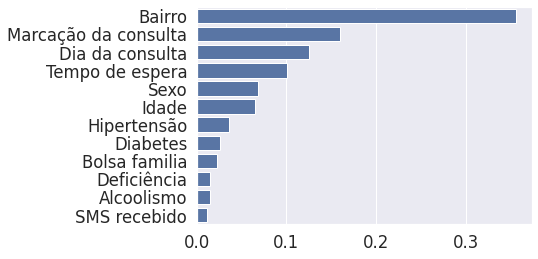

In [ ]:
sns.set(font_scale = 1.5)
sns.barplot(x=importances[:15], y=importances.index[:15], orient='h',color='b');
plt.savefig('importancia.png', format='png')

In [ ]:
impo_one = pd.get_dummies(train,columns=['bairro','Dia_da_consulta','Marcação_da_consulta',
        'Tempo_de_espera','Idade'])

#Etapa 6: Desbalanceando os conjuntos de dados

https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


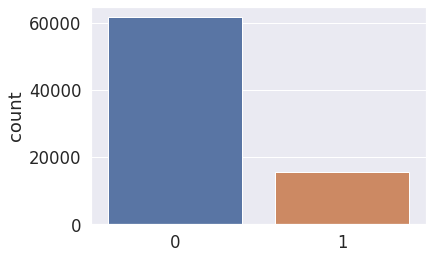

In [ ]:
sns.countplot(y_train);

In [ ]:
ros = RandomOverSampler(sampling_strategy=1)
X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

In [ ]:
print(pd.Series(y_resampled).value_counts())

0    61683
1    61683
dtype: int64


In [ ]:
y_resampled.shape

(123366,)

In [ ]:
y_te= pd.DataFrame(y_test)

#Etapa 7: Criando algoritimos

##Criando algoritmo Random Florest


In [ ]:
class_random_desb= DecisionTreeClassifier(max_depth=100, random_state=42,min_samples_leaf=4)
class_random_desb.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=100, min_samples_leaf=4, random_state=42)

###Avaliando nos conjuntos de treinamaneto

In [ ]:
predicao_random_treino_desb= class_random_desb.predict(X_resampled)

Text(0.5, 1.0, 'Matriz de confusao')

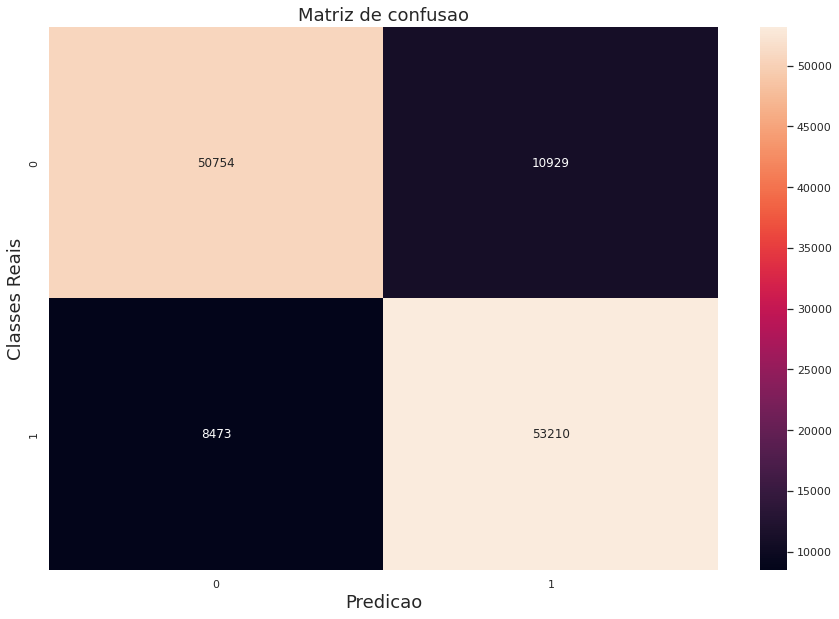

In [ ]:
conf_tre_rand = confusion_matrix(y_resampled,predicao_random_treino_desb)
sns.heatmap(confusion_matrix(y_resampled,predicao_random_treino_desb),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)



In [ ]:
cross_val_score(class_random_desb, X_resampled, y_resampled, cv=10,scoring='recall')

array([0.7075227 , 0.71611543, 0.72811284, 0.7847301 , 0.7839196 ,
       0.77516615, 0.78761349, 0.78372244, 0.78031777, 0.78080415])

In [ ]:
print(classification_report(y_resampled,predicao_random_treino_desb));

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     61683
           1       0.83      0.86      0.85     61683

    accuracy                           0.84    123366
   macro avg       0.84      0.84      0.84    123366
weighted avg       0.84      0.84      0.84    123366



In [ ]:
especificidade_rand_tre= conf_tre_rand[0][0]/(conf_tre_rand[0][0]+conf_tre_rand[0][1])
especificidade_rand_tre

0.8228199017557511

In [ ]:
conf_tre_rand[0][1]

10929

In [ ]:
npp_rand_tre = conf_tre_rand[0][0]/(conf_tre_rand[0][0]+conf_tre_rand[1][0])
npp_rand_tre

0.8569402468468773

###Avaliando nos conjuntos de teste

In [ ]:
predicao_random_teste_desb = class_random_desb.predict(x_test)

In [ ]:
prob_random_desb_test= cross_val_predict(class_random_desb, x_test, y_test, cv=10,
                                    method="predict_proba")

Text(0.5, 1.0, 'Matriz de confusao')

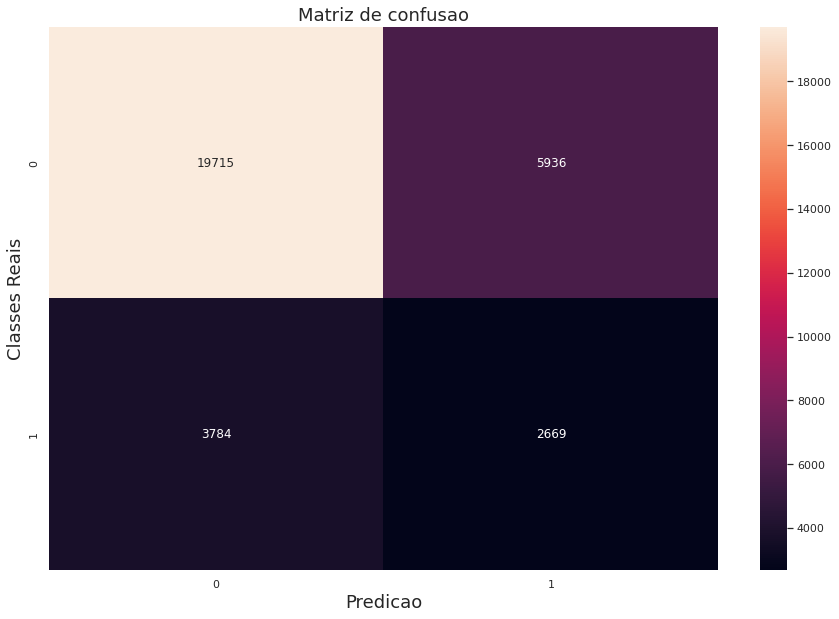

In [ ]:
conf_teste_rand = confusion_matrix(y_test,predicao_random_teste_desb)
sns.heatmap(confusion_matrix(y_test,predicao_random_teste_desb),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
especificidade_rand_teste= conf_teste_rand[0][0]/(conf_teste_rand[0][0]+conf_teste_rand[0][1])
especificidade_rand_teste

0.7685860200382051

In [ ]:
npp_rand_teste = conf_teste_rand[0][0]/(conf_teste_rand[0][0]+conf_teste_rand[1][0])
npp_rand_teste

0.838971871143453

In [ ]:
print(classification_report(y_test,predicao_random_teste_desb));

              precision    recall  f1-score   support

           0       0.84      0.77      0.80     25651
           1       0.31      0.41      0.35      6453

    accuracy                           0.70     32104
   macro avg       0.57      0.59      0.58     32104
weighted avg       0.73      0.70      0.71     32104



##Criando o algoritimo do ADBOOST

In [ ]:
ada_clf_desb = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=400,
    algorithm="SAMME", learning_rate=1, random_state=42)

In [ ]:
ada_clf_desb.fit(X_resampled, y_resampled)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=400, random_state=42)

###Avaliando no conjunto de treinamento

---



In [ ]:
predicao_ada_treino_desb= ada_clf_desb.predict(X_resampled)

Text(0.5, 1.0, 'Matriz de confusao')

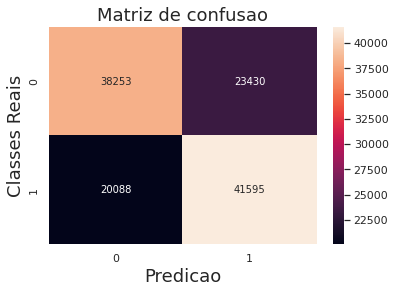

In [ ]:
conf_ada_rand = confusion_matrix(y_resampled,predicao_ada_treino_desb)
sns.heatmap(confusion_matrix(y_resampled,predicao_ada_treino_desb),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
especificidade_ada_tre= conf_ada_rand[0][0]/(conf_ada_rand[0][0]+conf_ada_rand[0][1])
especificidade_ada_tre

0.6201546617382423

In [ ]:
npp_ada_tre = conf_ada_rand[0][0]/(conf_ada_rand[0][0]+conf_ada_rand[1][0])
npp_ada_tre

0.6556795392605543

In [ ]:
cross_val_score(ada_clf_desb, X_resampled, y_resampled, cv=10)


In [ ]:
print(classification_report(y_resampled,predicao_ada_treino_desb));

###Avaliando no conjunto de teste

In [ ]:
predicao_ada_teste_desb= ada_clf_desb.predict(x_test)

In [ ]:
prob_ada_desb_test= cross_val_predict(ada_clf_desb, x_test, y_test, cv=10,method="predict_proba")
prob_ada_desb_test

array([[0.59285441, 0.40714559],
       [0.53504762, 0.46495238],
       [0.54751212, 0.45248788],
       ...,
       [0.5371632 , 0.4628368 ],
       [0.54249824, 0.45750176],
       [0.60251801, 0.39748199]])

Text(0.5, 1.0, 'Matriz de confusao')

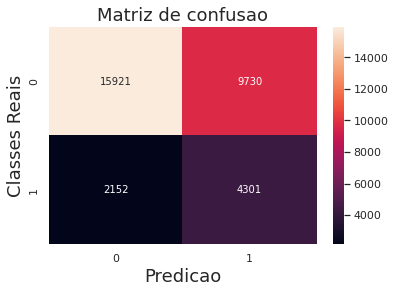

In [ ]:
conf_teste_ada = confusion_matrix(y_test,predicao_ada_teste_desb)
sns.heatmap(confusion_matrix(y_test,predicao_ada_teste_desb),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
especificidade_ada_teste= conf_teste_ada[0][0]/(conf_teste_ada[0][0]+conf_teste_ada[0][1])
especificidade_ada_teste

0.6206775564305486

In [ ]:
npp_ada_teste = conf_teste_ada[0][0]/(conf_teste_ada[0][0]+conf_teste_ada[1][0])
npp_ada_teste

0.8809273501908925

In [ ]:
print(classification_report(y_test,predicao_ada_teste_desb));

              precision    recall  f1-score   support

           0       0.88      0.62      0.73     25651
           1       0.31      0.67      0.42      6453

    accuracy                           0.63     32104
   macro avg       0.59      0.64      0.57     32104
weighted avg       0.77      0.63      0.67     32104



##Criando algoritmo XGBOOST


In [ ]:
xg_boost_desb= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
xg_boost_desb.fit(X_resampled, y_resampled)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

###Avaliando no conjunto de treinamento

In [ ]:
predicao_xg_treino_desb= xg_boost_desb.predict(X_resampled)

In [ ]:
prob_xg_desb = cross_val_predict(xg_boost_desb, X_resampled, y_resampled, cv=10,
                                    method="predict_proba")
prob_xg_desb

array([[0.4282347 , 0.5717653 ],
       [0.70383516, 0.29616484],
       [0.59131262, 0.40868738],
       ...,
       [0.33814689, 0.66185311],
       [0.58472093, 0.41527907],
       [0.31432978, 0.68567022]])

Text(0.5, 1.0, 'Matriz de confusao')

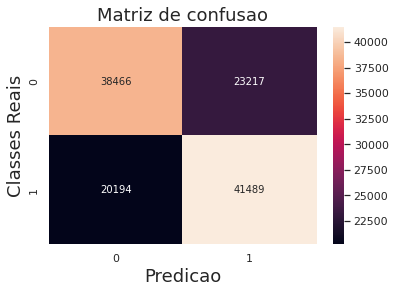

In [ ]:
conf_xg_rand = confusion_matrix(y_resampled,predicao_xg_treino_desb)
sns.heatmap(confusion_matrix(y_resampled,predicao_xg_treino_desb),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
especificidade_xg_tre= conf_xg_rand[0][0]/(conf_xg_rand[0][0]+conf_xg_rand[0][1])
especificidade_xg_tre

0.6236078011769856

In [ ]:
npp_xg_tre = conf_xg_rand[0][0]/(conf_xg_rand[0][0]+conf_xg_rand[1][0])
npp_xg_tre

0.6557449710194341

In [ ]:
cross_val_score(xg_boost_desb, X_resampled, y_resampled, cv=10)


array([0.65194131, 0.64910432, 0.64748318, 0.64837481, 0.64634838,
       0.65307611, 0.6519131 , 0.64380674, 0.64753567, 0.63659209])

In [ ]:
print(classification_report(y_resampled,predicao_xg_treino_desb));

              precision    recall  f1-score   support

           0       0.66      0.62      0.64     61683
           1       0.64      0.67      0.66     61683

    accuracy                           0.65    123366
   macro avg       0.65      0.65      0.65    123366
weighted avg       0.65      0.65      0.65    123366



###Avaliando no conjunto teste


In [ ]:
predicao_xg_teste_desb= xg_boost_desb.predict(x_test)

In [ ]:
prob_xg_desb_test= cross_val_predict(xg_boost_desb, x_test, y_test, cv=10,method="predict_proba")
prob_xg_desb_test

array([[0.81843007, 0.18156993],
       [0.69784668, 0.30215332],
       [0.71522326, 0.28477674],
       ...,
       [0.63500441, 0.36499559],
       [0.63395699, 0.36604301],
       [0.87328901, 0.12671099]])

Text(0.5, 1.0, 'Matriz de confusao')

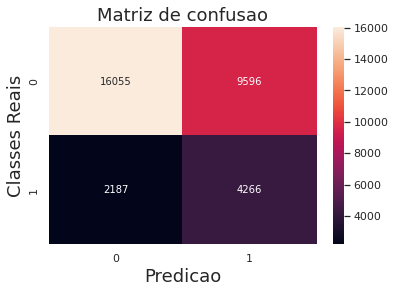

In [ ]:
conf_teste_xg = confusion_matrix(y_test,predicao_xg_teste_desb)
sns.heatmap(confusion_matrix(y_test,predicao_xg_teste_desb),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
especificidade_xg_teste= conf_teste_xg[0][0]/(conf_teste_xg[0][0]+conf_teste_xg[0][1])
especificidade_xg_teste

0.6259015243070446

In [ ]:
npp_xg_teste = conf_teste_xg[0][0]/(conf_teste_xg[0][0]+conf_teste_xg[1][0])
npp_xg_teste

0.8801118298432189

In [ ]:
print(classification_report(y_test,predicao_xg_teste_desb));

              precision    recall  f1-score   support

           0       0.88      0.63      0.73     25651
           1       0.31      0.66      0.42      6453

    accuracy                           0.63     32104
   macro avg       0.59      0.64      0.58     32104
weighted avg       0.77      0.63      0.67     32104



##Criando o algoritimo de Redes Neurais

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(109,),activity_regularizer='l2'))
model.add(tf.keras.layers.Dropout(0.50))
model.add(tf.keras.layers.Dense(units=100,activation='relu',activity_regularizer='l2'))
model.add(tf.keras.layers.Dropout(0.50))
model.add(tf.keras.layers.Dense(units=100,activation='relu',activity_regularizer='l2'))
model.add(tf.keras.layers.Dropout(0.50))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               11000     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [ ]:
#opt = keras.optimizers.Adam(learning_rate=0.01)
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics='accuracy')

In [ ]:
epochs_hist = model.fit(X_resampled, y_resampled, epochs=200,batch_size=500)

Epoch 1/200
247/247 [==============================] - 4s 9ms/step - loss: 0.7629 - accuracy: 0.5074
Epoch 2/200
247/247 [==============================] - 2s 9ms/step - loss: 0.7350 - accuracy: 0.5195
Epoch 3/200
247/247 [==============================] - 2s 9ms/step - loss: 0.7221 - accuracy: 0.5323
Epoch 4/200
247/247 [==============================] - 2s 9ms/step - loss: 0.7143 - accuracy: 0.5395
Epoch 5/200
247/247 [==============================] - 2s 9ms/step - loss: 0.7088 - accuracy: 0.5497
Epoch 6/200
247/247 [==============================] - 2s 9ms/step - loss: 0.7051 - accuracy: 0.5559
Epoch 7/200
247/247 [==============================] - 2s 9ms/step - loss: 0.7023 - accuracy: 0.5641
Epoch 8/200
247/247 [==============================] - 2s 8ms/step - loss: 0.6993 - accuracy: 0.5718
Epoch 9/200
247/247 [==============================] - 2s 9ms/step - loss: 0.6973 - accuracy: 0.5751
Epoch 10/200
247/247 [==============================] - 2s 9ms/step - loss: 0.6946 - accura

###Avaliando no conjunto de treino

In [ ]:
predicao_rede_treino_desb= model.predict(X_resampled)

In [ ]:
predicao_rede_treino_desb= (predicao_rede_treino_desb>0.5)

Text(0.5, 1.0, 'Confusion Matrix')

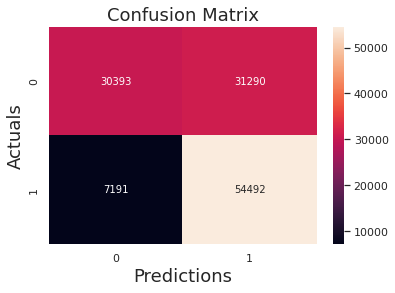

In [ ]:
conf_redes_rand = confusion_matrix(y_resampled,predicao_rede_treino_desb)
sns.heatmap(confusion_matrix(y_resampled,predicao_rede_treino_desb),annot=True,fmt='g')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [ ]:
especificidade_redes_tre= conf_redes_rand[0][0]/(conf_redes_rand[0][0]+conf_redes_rand[0][1])
especificidade_redes_tre

0.492728952871942

In [ ]:
npp_redes_tre = conf_redes_rand[0][0]/(conf_redes_rand[0][0]+conf_redes_rand[1][0])
npp_redes_tre

0.8086685823754789

In [ ]:
print(classification_report(y_resampled,predicao_rede_treino_desb));

              precision    recall  f1-score   support

           0       0.81      0.49      0.61     61683
           1       0.64      0.88      0.74     61683

    accuracy                           0.69    123366
   macro avg       0.72      0.69      0.68    123366
weighted avg       0.72      0.69      0.68    123366



###Avaliando no conjunto teste




In [ ]:
predicao_rede_test_desb= model.predict(x_test)

In [ ]:
predicao_rede_test_desb= (predicao_rede_test_desb>0.5)

Text(0.5, 1.0, 'Confusion Matrix')

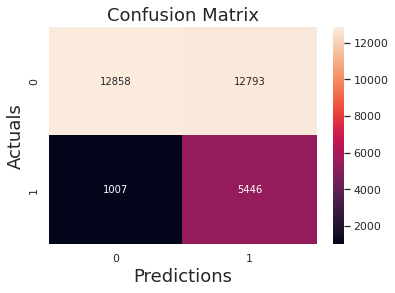

In [ ]:
conf_teste_redes = confusion_matrix(y_test,predicao_rede_test_desb)
sns.heatmap(confusion_matrix(y_test,predicao_rede_test_desb),annot=True,fmt='g')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [ ]:
especificidade_redes_teste= conf_teste_redes[0][0]/(conf_teste_redes[0][0]+conf_teste_redes[0][1])
especificidade_redes_teste

0.5012670071342248

In [ ]:
npp_redes_teste = conf_teste_redes[0][0]/(conf_teste_redes[0][0]+conf_teste_redes[1][0])
npp_redes_teste

0.9273710782545979

In [ ]:
print(classification_report(y_test,predicao_rede_test_desb));

              precision    recall  f1-score   support

           0       0.93      0.50      0.65     25651
           1       0.30      0.84      0.44      6453

    accuracy                           0.57     32104
   macro avg       0.61      0.67      0.55     32104
weighted avg       0.80      0.57      0.61     32104



## Criando o algoritimo REGRESSAO LOGISTICA

In [ ]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
log_predicao = log_reg.predict(X_resampled)

### Avaliando o algoritimo no conjunto de treino

Text(0.5, 1.0, 'Matriz de confusao')

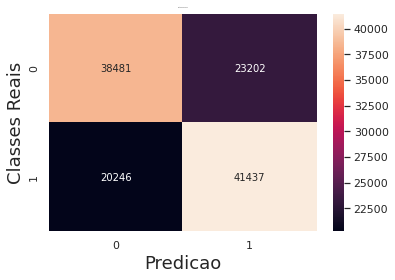

In [ ]:
## confusion matriz
conf_lg_rand = confusion_matrix(y_resampled,log_predicao)
sns.heatmap(confusion_matrix(y_resampled,log_predicao),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=1)



In [ ]:
especificidade_lg_tre= conf_lg_rand[0][0]/(conf_lg_rand[0][0]+conf_lg_rand[0][1])
especificidade_lg_tre

0.6238509800106998

In [ ]:
npp_lg_tre = conf_lg_rand[0][0]/(conf_lg_rand[0][0]+conf_lg_rand[1][0])
npp_lg_tre

0.6552522689733853

In [ ]:
print(classification_report(y_resampled,log_predicao))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64     61683
           1       0.64      0.67      0.66     61683

    accuracy                           0.65    123366
   macro avg       0.65      0.65      0.65    123366
weighted avg       0.65      0.65      0.65    123366



In [ ]:
cross_val_score(log_reg, X_resampled, y_resampled, cv=10)

array([0.65186026, 0.64942855, 0.64764529, 0.64821269, 0.6465105 ,
       0.652914  , 0.65150778, 0.64307717, 0.64850843, 0.63764591])

###Avaliando o algoritimo conjunto de teste

In [ ]:
log_predicao_teste = log_reg.predict(x_test)

Text(0.5, 1.0, 'Matriz de confusao')

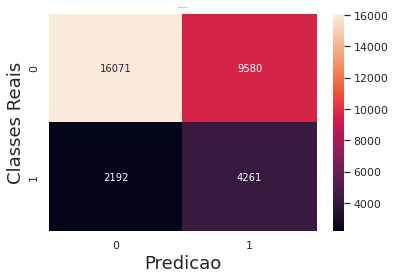

In [ ]:
conf_teste_lg = confusion_matrix(y_test,log_predicao_teste)
sns.heatmap(confusion_matrix(y_test,log_predicao_teste),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=1)


In [ ]:
especificidade_lg_teste= conf_teste_lg[0][0]/(conf_teste_lg[0][0]+conf_teste_lg[0][1])
especificidade_lg_teste

0.6265252816654322

In [ ]:
npp_lg_teste = conf_teste_lg[0][0]/(conf_teste_lg[0][0]+conf_teste_lg[1][0])
npp_lg_teste

0.879975907572688

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_predicao_teste));

              precision    recall  f1-score   support

           0       0.88      0.63      0.73     25651
           1       0.31      0.66      0.42      6453

    accuracy                           0.63     32104
   macro avg       0.59      0.64      0.58     32104
weighted avg       0.76      0.63      0.67     32104



In [ ]:
logis_test= cross_val_predict(log_reg, x_test, y_test, cv=10,method="predict_proba")
logis_test

array([[0.82017619, 0.17982381],
       [0.6945821 , 0.3054179 ],
       [0.7150918 , 0.2849082 ],
       ...,
       [0.63569509, 0.36430491],
       [0.63239664, 0.36760336],
       [0.87478554, 0.12521446]])

##AVALAICAO DOS MODELOS

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('REGRESSAO LOGISTICA:','                                        ','REGRESSAO LOGISTICA:')
print('ACCURACY:',accuracy_score(y_resampled,log_predicao),'              ','ACCURACY:',accuracy_score(y_test,log_predicao_teste))
print('PPV:',precision_score(y_resampled,log_predicao),'              ','PPV:',precision_score(y_test,log_predicao_teste))
print('NPV:',npp_lg_tre,'                                                 ','NPV:',npp_lg_teste)
print('SENSIBILIDADE:',recall_score(y_resampled,log_predicao),'                ','SENSIBILIDADE:',recall_score(y_test,log_predicao_teste))
print('ESPECIFICIDADE:',especificidade_lg_tre,'                ','ESPECIFICIDADE:',especificidade_lg_teste)
print('F1 SCORE:',f1_score(y_resampled,log_predicao),'                     ','F1 SCORE:',f1_score(y_test,log_predicao_teste))
print('AUC:',roc_auc_score(y_resampled,log_predicao),'                     ','AUC:',roc_auc_score(y_test,log_predicao_teste))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('RANDOM FOREST:','                                                ','RANDOM FOREST:')
print('ACCURACY:',accuracy_score(y_resampled,predicao_random_treino_desb),'              ','ACCURACY:',accuracy_score(y_test,predicao_random_teste_desb))
print('PPV:',precision_score(y_resampled,predicao_random_treino_desb),'              ','PPV:',precision_score(y_test,predicao_random_teste_desb))
print('NPV:',npp_rand_tre,'                                                 ','NPV:',npp_rand_teste)
print('SENSIBILIDADE:',recall_score(y_resampled,predicao_random_treino_desb),'                ','SENSIBILIDADE:',recall_score(y_test,predicao_random_teste_desb))
print('ESPECIFICIDADE:',especificidade_rand_tre,'                ','ESPECIFICIDADE:',especificidade_rand_teste)
print('F1 SCORE:',f1_score(y_resampled,predicao_random_treino_desb),'                     ','F1 SCORE:',f1_score(y_test,predicao_random_teste_desb))
print('AUC:',roc_auc_score(y_resampled,predicao_random_treino_desb),'                     ','AUC:',roc_auc_score(y_test,predicao_random_teste_desb))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('ADABOOST:','                                                ','ADABOOST:')
print('ACCURACY:',accuracy_score(y_resampled,predicao_ada_treino_desb),'              ','ACCURACY:',accuracy_score(y_test,predicao_ada_teste_desb))
print('PPV:',precision_score(y_resampled,predicao_ada_treino_desb),'              ','PPV:',precision_score(y_test,predicao_ada_teste_desb))
print('NPV:',npp_ada_tre,'                                                 ','NPV:',npp_ada_teste)
print('SENSIBILIDADE:',recall_score(y_resampled,predicao_ada_treino_desb),'                ','SENSIBILIDADE:',recall_score(y_test,predicao_ada_teste_desb))
print('ESPECIFICIDADE:',especificidade_ada_tre,'                ','ESPECIFICIDADE:',especificidade_ada_teste)
print('F1 SCORE:',f1_score(y_resampled,predicao_ada_treino_desb),'                     ','F1 SCORE:',f1_score(y_test,predicao_ada_teste_desb))
print('AUC:',roc_auc_score(y_resampled,predicao_ada_treino_desb),'                     ','AUC:',roc_auc_score(y_test,predicao_ada_teste_desb))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('XBOOST:','                                                ','XGBOOST:')
print('ACCURACY:',accuracy_score(y_resampled,predicao_xg_treino_desb),'              ','ACCURACY:',accuracy_score(y_test,predicao_xg_teste_desb))
print('PPV:',precision_score(y_resampled,predicao_xg_treino_desb),'              ','PPV:',precision_score(y_test,predicao_xg_teste_desb))
print('NPV:',npp_xg_tre,'                                                 ','NPV:',npp_xg_teste)
print('SENSIBILIDADE:',recall_score(y_resampled,predicao_xg_treino_desb),   '                ','SENSIBILIDADE:',recall_score(y_test,predicao_xg_teste_desb))
print('ESPECIFICIDADE:',especificidade_xg_tre,'                ','ESPECIFICIDADE:',especificidade_xg_teste)
print('F1 SCORE:',f1_score(y_resampled,predicao_xg_treino_desb),'                     ','F1 SCORE:',f1_score(y_test,predicao_xg_teste_desb))
print('AUC:',roc_auc_score(y_resampled,predicao_xg_treino_desb),'                     ','AUC:',roc_auc_score(y_test,predicao_xg_teste_desb))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('REDE NEURAIS:','                                        ','REDE NEURAIS:')
print('ACCURACY:',accuracy_score(y_resampled,predicao_rede_treino_desb),'              ','ACCURACY:',accuracy_score(y_test,predicao_rede_test_desb))
print('PPV:',precision_score(y_resampled,predicao_rede_treino_desb),'              ','PPV:',precision_score(y_test,predicao_rede_test_desb))
print('NPV:',npp_redes_tre,'                                                 ','NPV:',npp_redes_teste)
print('SENSIBILIDADE:',recall_score(y_resampled,predicao_rede_treino_desb),'                ','SENSIBILIDADE:',recall_score(y_test,predicao_rede_test_desb))
print('ESPECIFICIDADE:',especificidade_redes_tre,'                ','ESPECIFICIDADE:',especificidade_redes_teste)
print('F1 SCORE:',f1_score(y_resampled,predicao_rede_treino_desb),'                     ','F1 SCORE:',f1_score(y_test,predicao_rede_test_desb))
print('AUC:',roc_auc_score(y_resampled,predicao_rede_treino_desb),'                     ','AUC:',roc_auc_score(y_test,predicao_rede_test_desb))
print('--------------------------------------------------------------------------------------------------------------')

RESULTADOS NOS DADOS DE TREINAMENTO                           RESULTADOS NOS DADOS DE TESTE
REGRESSAO LOGISTICA:                                          REGRESSAO LOGISTICA:
ACCURACY: 0.6478122010926836                ACCURACY: 0.6333167206578619
PPV: 0.6410526152941722                PPV: 0.3078534787948848
NPV: 0.6552522689733853                                                   NPV: 0.879975907572688
SENSIBILIDADE: 0.6717734221746673                  SENSIBILIDADE: 0.6603130326979699
ESPECIFICIDADE: 0.6238509800106998                  ESPECIFICIDADE: 0.6265252816654322
F1 SCORE: 0.6560535773657795                       F1 SCORE: 0.4199270720409974
AUC: 0.6478122010926836                       AUC: 0.6434191571817011
--------------------------------------------------------------------------------------------------------------
RESULTADOS NOS DADOS DE TREINAMENTO                           RESULTADOS NOS DADOS DE TESTE
RANDOM FOREST:                                                  RAN

##Curva ROC desbalanceado no dados de teste

In [ ]:
y_te = pd.DataFrame(y_test)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Falso Positivo', fontsize=16)
    plt.ylabel('Verdadeiro Positivo', fontsize=16)

In [ ]:
fpr_forest_desb, tpr_forest_desb, thresholds_forest_desb= roc_curve(y_te,prob_random_desb_test[:,1])

In [ ]:
fpr_extra_desb_test, tpr_extra_desb_test, thresholds_extra_desb_test= roc_curve(y_te,prob_random_desb_treino[:,1])

In [ ]:
fpr_ada_test, tpr_ada_test, thresholds_ada_test = roc_curve(y_te,prob_ada_desb_test[:,1])

In [ ]:
fpr_xg_desb_test, tpr_xg_desb_test, thresholds_xg_desb_test= roc_curve(y_te,prob_xg_desb_test[:,1])

In [ ]:
fpr_lg_desb_test, tpr_lg_desb_test, thresholds_lg_desb_test= roc_curve(y_te,logis_test[:,1])

In [ ]:
fpr_tensor_test, tpr_tensor_test, thresholds_tensor_test = roc_curve(y_te,predicao_rede_test_desb)

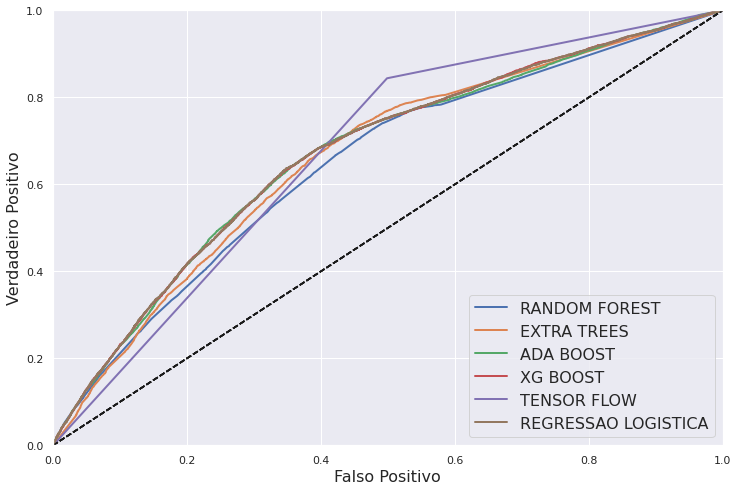

In [ ]:
plt.figure(figsize=(12, 8))
plot_roc_curve(fpr_forest_desb, tpr_forest_desb, "RANDOM FOREST")
plot_roc_curve(fpr_extra_desb_test, tpr_extra_desb_test, "EXTRA TREES")
plot_roc_curve(fpr_ada_test, tpr_ada_test, "ADA BOOST")
plot_roc_curve(fpr_xg_desb_test, tpr_xg_desb_test, "XG BOOST")
plot_roc_curve(fpr_tensor_test, tpr_tensor_test, "TENSOR FLOW")
plot_roc_curve(fpr_lg_desb_test, tpr_lg_desb_test, "REGRESSAO LOGISTICA")

plt.legend(loc="lower right", fontsize=16)

#Etapa 8:Aplicando Random SearchCV

###Criando o algoritimo Random Florest com Random Search

                       

In [ ]:
param_grid = {'max_depth': [1,2,60,70,80,90,100],
              'max_features': [1, 3, 4,5,6,8,10],
              'splitter':['best', 'random'],
                 'criterion':['gini','entropy'],
                 }

In [ ]:

class_random_desb_grid= RandomizedSearchCV(DecisionTreeClassifier(), param_grid,
                                n_iter=100, cv=5,
                                verbose=2, n_jobs=4, random_state=42)

In [ ]:
class_random_desb_grid.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 60, 70, 80, 90,
                                                      100],
                                        'max_features': [1, 3, 4, 5, 6, 8, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [ ]:
class_random_desb_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features=8,
                       splitter='random')

In [ ]:
class_random_desb_grid.best_score_

0.8242952549016092

####Treinando com os melhores parametros
DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features=8,
                       splitter='random')

In [ ]:
class_random_grid= DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features=8,
                       splitter='random',random_state=42)
class_random_grid.fit(X_resampled, y_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=100, max_features=8,
                       random_state=42, splitter='random')

####Avaliando nos dados de treinamento





In [ ]:
predicao_random_treino_grid= class_random_grid.predict(X_resampled)

Text(0.5, 1.0, 'Matriz de confusao')

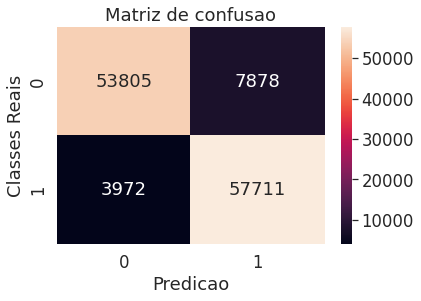

In [ ]:
conf_tre_rand = confusion_matrix(y_resampled,predicao_random_treino_grid)
sns.heatmap(confusion_matrix(y_resampled,predicao_random_treino_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
cross_val_score(class_random_grid, X_resampled, y_resampled, cv=10)

array([0.81608171, 0.81656805, 0.82126935, 0.8345627 , 0.83140148,
       0.8398314 , 0.83333333, 0.83398184, 0.83511673, 0.83552205])

In [ ]:
print(classification_report(y_resampled,predicao_random_treino_grid));

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     61683
           1       0.88      0.94      0.91     61683

    accuracy                           0.90    123366
   macro avg       0.91      0.90      0.90    123366
weighted avg       0.91      0.90      0.90    123366



In [ ]:
especificidade_rand = conf_tre_rand[0][0]/(conf_tre_rand[0][0]+conf_tre_rand[0][1])
especificidade_rand

0.8722824765332425

In [ ]:
npp_rand = conf_tre_rand[0][0]/(conf_tre_rand[0][0]+conf_tre_rand[1][0])
npp_rand

0.9312529207123942

####Avaliando nos dados de test


In [ ]:
predicao_random_teste_grid = class_random_grid.predict(x_test)

In [ ]:
prob_random_desb_grid= cross_val_predict(class_random_grid, x_test, y_test, cv=10,
                                    method="predict_proba")

Text(0.5, 1.0, 'Matriz de confusao')

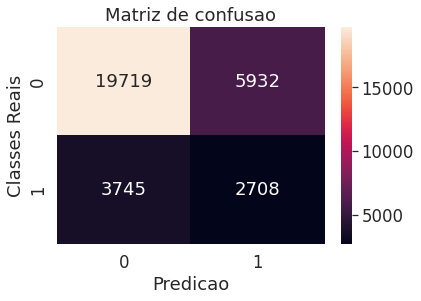

In [ ]:
conf_rand = confusion_matrix(y_test,predicao_random_teste_grid)
sns.heatmap(confusion_matrix(y_test,predicao_random_teste_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
print(classification_report(y_test,predicao_random_teste_grid));

              precision    recall  f1-score   support

           0       0.84      0.77      0.80     25651
           1       0.31      0.42      0.36      6453

    accuracy                           0.70     32104
   macro avg       0.58      0.59      0.58     32104
weighted avg       0.73      0.70      0.71     32104



In [ ]:
especificidade_rand_teste= conf_rand [0][0]/(conf_rand [0][0]+conf_rand [0][1])
especificidade_rand_teste

0.768741959377802

In [ ]:
npp_rand_teste = conf_rand [0][0]/(conf_rand [0][0]+conf_rand [1][0])
npp_rand_teste

0.8403937947494033

In [ ]:
param_grid={
        'n_estimators': [10,500,600,700,800,900,1000],
        'criterion':['gini','entropy'],
        'max_features': [1,10,50,100,200],
        'max_features':['auto', 'sqrt', 'log2'],
        'min_samples_leaf': [10,100,200,300,600,800],
        'min_samples_split': [10,100,200,300,600,800]}

In [ ]:
random_search_desb = RandomizedSearchCV(ExtraTreesClassifier(), param_grid,
                                n_iter=10, cv=5,
                                verbose=10, n_jobs=4, random_state=42)

In [ ]:
random_search_desb.fit(X_resampled, y_resampled)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
random_search_desb.best_estimator_

ExtraTreesClassifier(criterion='entropy', max_features='sqrt',
                     min_samples_leaf=10, min_samples_split=800,
                     n_estimators=500)

In [ ]:
extra_tree_desb_grid = ExtraTreesClassifier(criterion='entropy', max_features='sqrt',
                     min_samples_leaf=10, min_samples_split=800,
                     n_estimators=500,random_state=42)
extra_tree_desb_grid.fit(X_resampled, y_resampled)

ExtraTreesClassifier(criterion='entropy', max_features='sqrt',
                     min_samples_leaf=10, min_samples_split=800,
                     n_estimators=500, random_state=42)

In [ ]:
predicao_extra_treino_grid= extra_tree_desb_grid.predict(X_resampled)

Text(0.5, 1.0, 'Matriz de confusao')

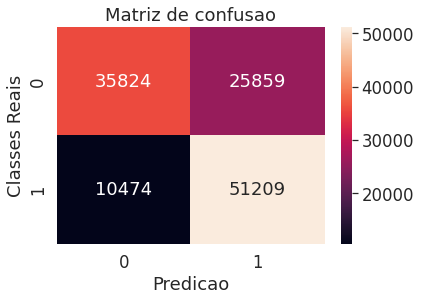

In [ ]:
conf_extra_rand = confusion_matrix(y_resampled,predicao_extra_treino_grid)
sns.heatmap(confusion_matrix(y_resampled,predicao_extra_treino_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
especificidade_extra = conf_extra_rand[0][0]/(conf_extra_rand[0][0]+conf_extra_rand[0][1])
especificidade_extra

0.5807759025987711

In [ ]:
npp_extra = conf_extra_rand[0][0]/(conf_extra_rand[0][0]+conf_extra_rand[1][0])
npp_extra

0.7737699252667501

In [ ]:
cross_val_score(extra_tree_desb_grid, X_resampled, y_resampled, cv=10)


array([0.68866013, 0.69174029, 0.69165924, 0.69660371, 0.69125395,
       0.69660371, 0.69276913, 0.68717575, 0.68798638, 0.69447147])

In [ ]:
print(classification_report(y_resampled,predicao_extra_treino_grid));

              precision    recall  f1-score   support

           0       0.77      0.58      0.66     61683
           1       0.66      0.83      0.74     61683

    accuracy                           0.71    123366
   macro avg       0.72      0.71      0.70    123366
weighted avg       0.72      0.71      0.70    123366



In [ ]:
x_test.shape

(32104, 109)

In [ ]:
predicao_extra_test_grid= extra_tree_desb_grid.predict(x_test)

In [ ]:
prob_extra_grid_teste= cross_val_predict(extra_tree_desb_grid, x_test, y_test, cv=10,
                                    method="predict_proba")

Text(0.5, 1.0, 'Matriz de confusao')

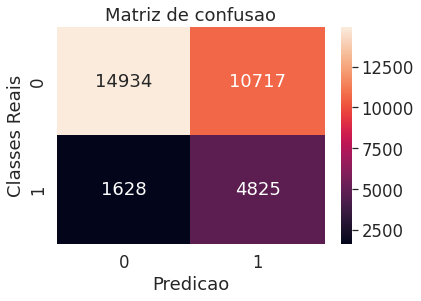

In [ ]:
conf_extra_teste = confusion_matrix(y_test,predicao_extra_test_grid)
sns.heatmap(confusion_matrix(y_test,predicao_extra_test_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
especificidade_extra_teste= conf_extra_teste[0][0]/(conf_extra_teste[0][0]+conf_extra_teste[0][1])
especificidade_extra_teste

0.5821995243850142

In [ ]:
npp_extra_teste = conf_extra_teste[0][0]/(conf_extra_teste[0][0]+conf_extra_teste[1][0])
npp_extra_teste

0.9017026929114841

In [ ]:
print(classification_report(y_test,predicao_extra_test_grid));

              precision    recall  f1-score   support

           0       0.90      0.58      0.71     25651
           1       0.31      0.75      0.44      6453

    accuracy                           0.62     32104
   macro avg       0.61      0.66      0.57     32104
weighted avg       0.78      0.62      0.65     32104



###Criando o algoritimo ADBOOST com random search 

In [ ]:
param_grid={
        'n_estimators': [10, 50, 100, 500,1000],
        'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0,1.1,1.2],
        'algorithm':['SAMME', 'SAMME.R']}

In [ ]:
class_ada_desb_grid= RandomizedSearchCV(AdaBoostClassifier(), param_grid,
                                n_iter=10, cv=5,
                                verbose=10, n_jobs=4, random_state=42)

In [ ]:
class_ada_desb_grid.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


####Treinando com os melhores parametros
AdaBoostClassifier(algorithm='SAMME', learning_rate=0.0001, n_estimators=10)

In [ ]:
ada_clf_desb_grid = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.0001, n_estimators=10,random_state=42)

In [ ]:
ada_clf_desb_grid.fit(X_resampled, y_resampled)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.0001, n_estimators=10,
                   random_state=42)

####Avaliando nos dados de treinamento

In [ ]:
predicao_ada_treino_grid= ada_clf_desb_grid.predict(X_resampled)

In [ ]:
prob_ada_grid = cross_val_predict(ada_clf_desb_grid, X_resampled, y_resampled, cv=10,
                                    method="predict_proba")
prob_ada_grid

array([[0.26894142, 0.73105858],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       ...,
       [0.73105858, 0.26894142],
       [0.26894142, 0.73105858],
       [0.26894142, 0.73105858]])

Text(0.5, 1.0, 'Matriz de confusao')

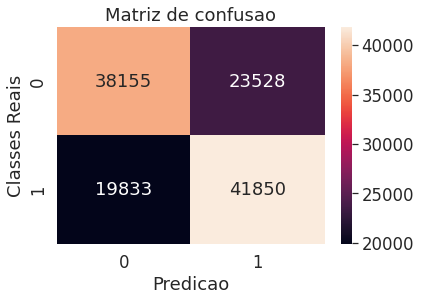

In [ ]:
conf_ada_rand = confusion_matrix(y_resampled,predicao_ada_treino_grid)
sns.heatmap(confusion_matrix(y_resampled,predicao_ada_treino_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
especificidade_ada = conf_ada_rand[0][0]/(conf_ada_rand[0][0]+conf_ada_rand[0][1])
especificidade_ada

0.6185658933579754

In [ ]:
npp_ada = conf_ada_rand[0][0]/(conf_ada_rand[0][0]+conf_ada_rand[1][0])
npp_ada

0.6579809615782576

In [ ]:
cross_val_score(ada_clf_desb_grid, X_resampled, y_resampled, cv=10)


array([0.65218449, 0.65032018, 0.64853692, 0.64813164, 0.64845586,
       0.65793953, 0.64891375, 0.63772698, 0.64421206, 0.64875162])

In [ ]:
print(classification_report(y_resampled,predicao_ada_treino_grid));

              precision    recall  f1-score   support

           0       0.66      0.62      0.64     61683
           1       0.64      0.68      0.66     61683

    accuracy                           0.65    123366
   macro avg       0.65      0.65      0.65    123366
weighted avg       0.65      0.65      0.65    123366



####Avaliando nos dados de teste

In [ ]:
predicao_ad_teste_grid= ada_clf_desb_grid.predict(x_test)

In [ ]:
prob_ad_grid_test= cross_val_predict(ada_clf_desb_grid, x_test, y_test, cv=10,method="predict_proba")
prob_ad_grid_test

array([[0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       ...,
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142],
       [0.73105858, 0.26894142]])

Text(0.5, 1.0, 'Matriz de confusao')

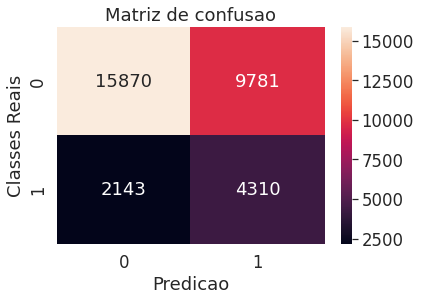

In [ ]:
conf_ada_teste = confusion_matrix(y_test,predicao_ad_teste_grid)
sns.heatmap(confusion_matrix(y_test,predicao_ad_teste_grid),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
especificidade_ada_teste= conf_ada_teste[0][0]/(conf_ada_teste[0][0]+conf_ada_teste[0][1])
especificidade_ada_teste

0.618689329850688

In [ ]:
npp_ada_teste = conf_ada_teste[0][0]/(conf_ada_teste[0][0]+conf_ada_teste[1][0])
npp_ada_teste

0.8810303669571976

In [ ]:
print(classification_report(y_test,predicao_ad_teste_grid));

              precision    recall  f1-score   support

           0       0.88      0.62      0.73     25651
           1       0.31      0.67      0.42      6453

    accuracy                           0.63     32104
   macro avg       0.59      0.64      0.57     32104
weighted avg       0.77      0.63      0.67     32104



###Criando o algoritimo XGBOOST com Random Search
GradientBoostingClassifier(learning_rate=1.2, max_features='log2',
                           n_estimators=500, random_state=42)

In [ ]:
param_grid={
        'loss':['deviance', 'exponential'],
        'n_estimators': [50, 100, 500,1000,2000],
         'criterion':['friedman_mse', 'mse', 'mae'],
        'learning_rate': [0.1, 1.0,1.1,1.2],
        'max_features':['auto', 'sqrt', 'log2']
        }

In [ ]:
xg_search_desb = RandomizedSearchCV(GradientBoostingClassifier(), param_grid,
                            n_iter=2, cv=5,
                                verbose=10, n_jobs=4, random_state=42)

In [ ]:
xg_search_desb.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [ ]:
xg_search_desb.best_estimator_

GradientBoostingClassifier(learning_rate=1.2, max_features='log2',
                           n_estimators=500)

In [ ]:
xg_boost_desb= GradientBoostingClassifier(learning_rate=1.2, max_features='log2',
                           n_estimators=500, random_state=42)
xg_boost_desb.fit(X_resampled, y_resampled)

GradientBoostingClassifier(learning_rate=1.2, max_features='log2',
                           n_estimators=500, random_state=42)

####Avaliando no conjunto de treinamento

In [ ]:
predicao_xg_treino_desb= xg_boost_desb.predict(X_resampled)

Text(0.5, 1.0, 'Matriz de confusao')

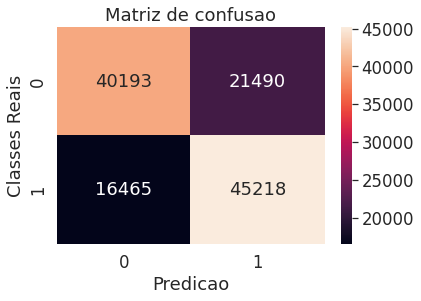

In [ ]:
conf_xg_rand = confusion_matrix(y_resampled,predicao_xg_treino_desb)
sns.heatmap(confusion_matrix(y_resampled,predicao_xg_treino_desb),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
especificidade_xg_tre= conf_xg_rand[0][0]/(conf_xg_rand[0][0]+conf_xg_rand[0][1])
especificidade_xg_tre

0.6516057908986268

In [ ]:
npp_xg_tre = conf_xg_rand[0][0]/(conf_xg_rand[0][0]+conf_xg_rand[1][0])
npp_xg_tre

0.7093967312647816

In [ ]:
cross_val_score(xg_boost_desb, X_resampled, y_resampled, cv=10)


array([0.67901435, 0.67455621, 0.68233768, 0.67933858, 0.68630948,
       0.67723109, 0.68174449, 0.67031453, 0.68125811, 0.68644617])

In [ ]:
print(classification_report(y_resampled,predicao_xg_treino_desb));

              precision    recall  f1-score   support

           0       0.71      0.65      0.68     61683
           1       0.68      0.73      0.70     61683

    accuracy                           0.69    123366
   macro avg       0.69      0.69      0.69    123366
weighted avg       0.69      0.69      0.69    123366



####Avaliando no conjunto teste


In [ ]:
predicao_xg_teste_desb= xg_boost_desb.predict(x_test)

In [ ]:
prob_xg_desb_test= cross_val_predict(xg_boost_desb, x_test, y_test, cv=10,method="predict_proba")
prob_xg_desb_test

array([[0.77143108, 0.22856892],
       [0.6801377 , 0.3198623 ],
       [0.6285323 , 0.3714677 ],
       ...,
       [0.78060805, 0.21939195],
       [0.56995371, 0.43004629],
       [0.89213437, 0.10786563]])

Text(0.5, 1.0, 'Matriz de confusao')

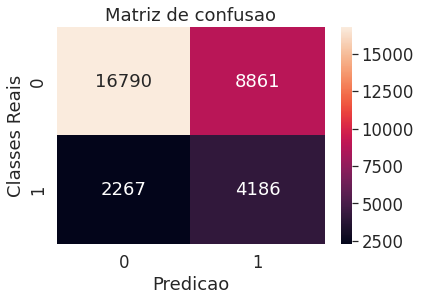

In [ ]:
conf_teste_xg = confusion_matrix(y_test,predicao_xg_teste_desb)
sns.heatmap(confusion_matrix(y_test,predicao_xg_teste_desb),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=18)

In [ ]:
especificidade_xg_teste= conf_teste_xg[0][0]/(conf_teste_xg[0][0]+conf_teste_xg[0][1])
especificidade_xg_teste

0.6545553779579744

In [ ]:
npp_xg_teste = conf_teste_xg[0][0]/(conf_teste_xg[0][0]+conf_teste_xg[1][0])
npp_xg_teste

0.8810410872645222

In [ ]:
print(classification_report(y_test,predicao_xg_teste_desb));

              precision    recall  f1-score   support

           0       0.88      0.65      0.75     25651
           1       0.32      0.65      0.43      6453

    accuracy                           0.65     32104
   macro avg       0.60      0.65      0.59     32104
weighted avg       0.77      0.65      0.69     32104



## Criando o algoritimo regressao logistica com random saerch

In [ ]:
param_grid={
        'penalty':['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'multi_class':['auto', 'ovr', 'multinomial'],
        'tol':[0.0001,0.001,0.01,0.1,1,1.1],
        'C':[1,1.1,1.2,1.3,1.4]
        }

In [ ]:
log_reg = RandomizedSearchCV(LogisticRegression(), param_grid,
                                n_iter=3, cv=5,
                                verbose=2, n_jobs=4, random_state=42)

In [ ]:
log_reg.fit(X_resampled, y_resampled)

In [ ]:

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
log_predicao = log_reg.predict(X_resampled)

### Avaliando o algoritimo no conjunto de treino

Text(0.5, 1.0, 'Matriz de confusao')

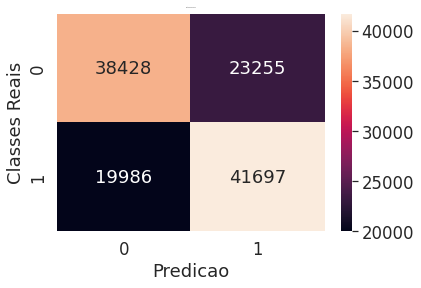

In [ ]:
## confusion matriz
conf_lg_rand = confusion_matrix(y_resampled,log_predicao)
sns.heatmap(confusion_matrix(y_resampled,log_predicao),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=1)



In [ ]:
especificidade_lg = conf_lg_rand[0][0]/(conf_lg_rand[0][0]+conf_lg_rand[0][1])
especificidade_lg

0.622991748131576

In [ ]:
npp_lg = conf_lg_rand[0][0]/(conf_lg_rand[0][0]+conf_lg_rand[1][0])
npp_lg

0.6578559934262335

In [ ]:
print(classification_report(y_resampled,log_predicao))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64     61683
           1       0.64      0.68      0.66     61683

    accuracy                           0.65    123366
   macro avg       0.65      0.65      0.65    123366
weighted avg       0.65      0.65      0.65    123366



In [ ]:
cross_val_score(log_reg, X_resampled, y_resampled, cv=10)

array([0.6517792 , 0.64983383, 0.64999595, 0.64853692, 0.64999595,
       0.66053335, 0.6501297 , 0.63829442, 0.64437419, 0.64956226])

###Avaliando o algoritimo conjunto de teste

In [ ]:
log_predicao_teste = log_reg.predict(x_test)

Text(0.5, 1.0, 'Matriz de confusao')

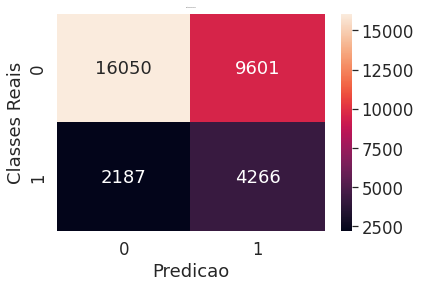

In [ ]:
conf_lg_teste = confusion_matrix(y_test,log_predicao_teste)
sns.heatmap(confusion_matrix(y_test,log_predicao_teste),annot=True,fmt='g')
plt.xlabel('Predicao',fontsize=18)
plt.ylabel('Classes Reais',fontsize=18);
plt.title('Matriz de confusao',fontsize=1)


In [ ]:
especificidade_lg_teste= conf_lg_teste[0][0]/(conf_lg_teste[0][0]+conf_lg_teste[0][1])
especificidade_lg_teste

0.6257066001325484

In [ ]:
npp_lg_teste = conf_lg_teste[0][0]/(conf_lg_teste[0][0]+conf_lg_teste[1][0])
npp_lg_teste

0.8800789603553216

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_predicao_teste));

              precision    recall  f1-score   support

           0       0.88      0.63      0.73     25651
           1       0.31      0.66      0.42      6453

    accuracy                           0.63     32104
   macro avg       0.59      0.64      0.58     32104
weighted avg       0.77      0.63      0.67     32104



In [ ]:
logis_test= cross_val_predict(log_reg, x_test, y_test, cv=10,method="predict_proba")
logis_test

array([[0.82017634, 0.17982366],
       [0.69458117, 0.30541883],
       [0.7150906 , 0.2849094 ],
       ...,
       [0.63569607, 0.36430393],
       [0.63239606, 0.36760394],
       [0.87478525, 0.12521475]])

##Criando o algoritimo de Redes Neurais

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(109,),activity_regularizer='l2'))
model.add(tf.keras.layers.Dropout(0.50))
model.add(tf.keras.layers.Dense(units=100,activation='relu',activity_regularizer='l2'))
model.add(tf.keras.layers.Dropout(0.50))
model.add(tf.keras.layers.Dense(units=100,activation='relu',activity_regularizer='l2'))
model.add(tf.keras.layers.Dropout(0.50))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               11000     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [ ]:
#opt = keras.optimizers.Adam(learning_rate=0.01)
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics='accuracy')

In [ ]:
epochs_hist = model.fit(X_resampled, y_resampled, epochs=200,batch_size=500)

Epoch 1/200
247/247 [==============================] - 6s 15ms/step - loss: 0.7696 - accuracy: 0.5097
Epoch 2/200
247/247 [==============================] - 4s 14ms/step - loss: 0.7411 - accuracy: 0.5183
Epoch 3/200
247/247 [==============================] - 3s 14ms/step - loss: 0.7271 - accuracy: 0.5262
Epoch 4/200
247/247 [==============================] - 3s 13ms/step - loss: 0.7190 - accuracy: 0.5339
Epoch 5/200
247/247 [==============================] - 4s 15ms/step - loss: 0.7132 - accuracy: 0.5399
Epoch 6/200
247/247 [==============================] - 3s 13ms/step - loss: 0.7091 - accuracy: 0.5466
Epoch 7/200
247/247 [==============================] - 3s 12ms/step - loss: 0.7058 - accuracy: 0.5526
Epoch 8/200
247/247 [==============================] - 3s 13ms/step - loss: 0.7034 - accuracy: 0.5551
Epoch 9/200
247/247 [==============================] - 3s 13ms/step - loss: 0.7011 - accuracy: 0.5597
Epoch 10/200
247/247 [==============================] - 3s 12ms/step - loss: 0.698

###Avaliando no conjunto de treino

In [ ]:
predicao_rede_treino_desb= model.predict(X_resampled)

In [ ]:
predicao_rede_treino_desb= (predicao_rede_treino_desb>0.5)

Text(0.5, 1.0, 'Confusion Matrix')

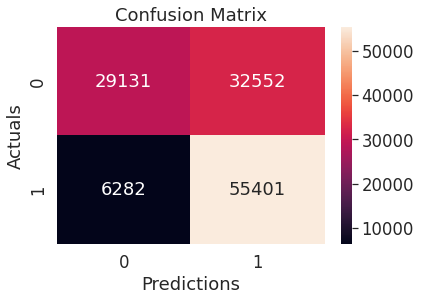

In [ ]:
conf_redes_rand = confusion_matrix(y_resampled,predicao_rede_treino_desb)
sns.heatmap(confusion_matrix(y_resampled,predicao_rede_treino_desb),annot=True,fmt='g')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [ ]:
especificidade_redes = conf_redes_rand[0][0]/(conf_redes_rand[0][0]+conf_redes_rand[0][1])
especificidade_redes

0.47226950699544445

In [ ]:
npp_redes = conf_redes_rand[0][0]/(conf_redes_rand[0][0]+conf_redes_rand[1][0])
npp_redes

0.8226075170135261

In [ ]:
print(classification_report(y_resampled,predicao_rede_treino_desb));

              precision    recall  f1-score   support

           0       0.82      0.47      0.60     61683
           1       0.63      0.90      0.74     61683

    accuracy                           0.69    123366
   macro avg       0.73      0.69      0.67    123366
weighted avg       0.73      0.69      0.67    123366



###Avaliando no conjunto teste




In [ ]:
predicao_rede_test_desb= model.predict(x_test)

In [ ]:
predicao_rede_test_desb= (predicao_rede_test_desb>0.5)

Text(0.5, 1.0, 'Confusion Matrix')

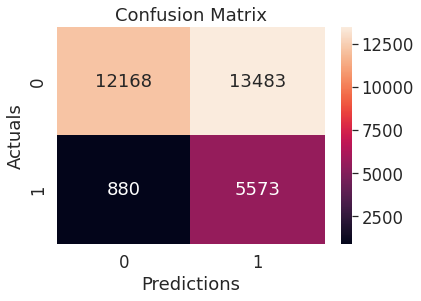

In [ ]:
conf_redes_teste = confusion_matrix(y_test,predicao_rede_test_desb)
sns.heatmap(confusion_matrix(y_test,predicao_rede_test_desb),annot=True,fmt='g')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [ ]:
especificidade_redes_teste= conf_redes_teste[0][0]/(conf_redes_teste[0][0]+conf_redes_teste[0][1])
especificidade_redes_teste

0.4743674710537601

In [ ]:
npp_redes_teste = conf_redes_teste[0][0]/(conf_redes_teste[0][0]+conf_redes_teste[1][0])
npp_redes_teste

0.9325567136725935

In [ ]:
print(classification_report(y_test,predicao_rede_test_desb));

              precision    recall  f1-score   support

           0       0.93      0.47      0.63     25651
           1       0.29      0.86      0.44      6453

    accuracy                           0.55     32104
   macro avg       0.61      0.67      0.53     32104
weighted avg       0.80      0.55      0.59     32104



# RESULTADOS DOS CLASSIFICADORES


In [ ]:
print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('REGRESSAO LOGISTICA:','                                        ','REGRESSAO LOGISTICA:')
print('ACCURACY:',accuracy_score(y_resampled,log_predicao),'              ','ACCURACY:',accuracy_score(y_test,log_predicao_teste))
print('PPV:',precision_score(y_resampled,log_predicao),'              ','PPV:',precision_score(y_test,log_predicao_teste))
print('NPV:',npp_lg,'                                                 ','NPV:',npp_lg_teste)
print('SENSIBILIDADE:',recall_score(y_resampled,log_predicao),'                ','SENSIBILIDADE:',recall_score(y_test,log_predicao_teste))
print('ESPECIFICIDADE:',especificidade_lg,'                ','ESPECIFICIDADE:',especificidade_lg_teste)
print('F1 SCORE:',f1_score(y_resampled,log_predicao),'                     ','F1 SCORE:',f1_score(y_test,log_predicao_teste))
print('AUC:',roc_auc_score(y_resampled,log_predicao),'                     ','AUC:',roc_auc_score(y_test,log_predicao_teste))
print('--------------------------------------------------------------------------------------------------------------')
print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('RANDOM FOREST:','                                                ','RANDOM FOREST:')
print('ACCURACY:',accuracy_score(y_resampled,predicao_random_treino_grid),'              ','ACCURACY:',accuracy_score(y_test,predicao_random_teste_grid))
print('PPV:',precision_score(y_resampled,predicao_random_treino_grid),'              ','PPV:',precision_score(y_test,predicao_random_teste_grid))
print('NPV:',npp_rand,'                                                 ','NPV:',npp_rand_teste)
print('SENSIBILIDADE:',recall_score(y_resampled,predicao_random_treino_grid),'                ','SENSIBILIDADE:',recall_score(y_test,predicao_random_teste_grid))
print('ESPECIFICIDADE:',especificidade_rand,'                ','ESPECIFICIDADE:',especificidade_ada_teste)
print('F1 SCORE:',f1_score(y_resampled,predicao_random_treino_grid),'                     ','F1 SCORE:',f1_score(y_test,predicao_random_teste_grid))
print('AUC:',roc_auc_score(y_resampled,predicao_random_treino_grid),'                     ','AUC:',roc_auc_score(y_test,predicao_random_teste_grid))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('REDES NEURAIS:','                                                ','REDES NEURAIS:')
print('ACCURACY:',accuracy_score(y_resampled,predicao_rede_treino_desb),'              ','ACCURACY:',accuracy_score(y_test,predicao_rede_test_desb))
print('PPV:',precision_score(y_resampled,predicao_rede_treino_desb),'              ','PPV:',precision_score(y_test,predicao_rede_test_desb))
print('NPV:',npp_redes,'                                                 ','NPV:',npp_extra_teste)
print('SENSIBILIDADE:',recall_score(y_resampled,predicao_rede_treino_desb),'                ','SENSIBILIDADE:',recall_score(y_test,predicao_rede_test_desb))
print('ESPECIFICIDADE:',especificidade_redes,'                ','ESPECIFICIDADE:',especificidade_redes_teste)
print('F1 SCORE:',f1_score(y_resampled,predicao_rede_treino_desb),'                     ','F1 SCORE:',f1_score(y_test,predicao_rede_test_desb))
print('AUC:',roc_auc_score(y_resampled,predicao_rede_treino_desb),'                     ','AUC:',roc_auc_score(y_test,predicao_rede_test_desb))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('ADABOOST:','                                                ','ADABOOST:')
print('ACCURACY:',accuracy_score(y_resampled,predicao_ada_treino_grid),'              ','ACCURACY:',accuracy_score(y_test,predicao_ad_teste_grid))
print('PPV:',precision_score(y_resampled,predicao_ada_treino_grid),'              ','PRECISAO:',precision_score(y_test,predicao_ad_teste_grid))
print('NPV:',npp_ada,'                                                 ','NPV:',npp_ada_teste)
print('SENSIBILIDADE:',recall_score(y_resampled,predicao_ada_treino_grid),   '                ','SENSIBIDADE:',recall_score(y_test,predicao_ad_teste_grid))
print('ESPECIFICIDADE:',especificidade_ada,'                ','ESPECIFICIDADE:',especificidade_extra_teste)
print('F1 SCORE:',f1_score(y_resampled,predicao_ada_treino_grid),'                     ','F1 SCORE:',f1_score(y_test,predicao_ad_teste_grid))
print('AUC:',roc_auc_score(y_resampled,predicao_ada_treino_grid),'                     ','AUC:',roc_auc_score(y_test,predicao_ad_teste_grid))
print('--------------------------------------------------------------------------------------------------------------')

print('RESULTADOS NOS DADOS DE TREINAMENTO','                         ','RESULTADOS NOS DADOS DE TESTE' )
print('XBOOST:','                                                ','XGBOOST:')
print('ACCURACY:',accuracy_score(y_resampled,predicao_xg_treino_desb),'              ','ACCURACY:',accuracy_score(y_test,predicao_xg_teste_desb))
print('PPV:',precision_score(y_resampled,predicao_xg_treino_desb),'              ','PPV:',precision_score(y_test,predicao_xg_teste_desb))
print('NPV:',npp_xg_tre,'                                                 ','NPV:',npp_xg_teste)
print('SENSIBILIDADE:',recall_score(y_resampled,predicao_xg_treino_desb),   '                ','SENSIBILIDADE:',recall_score(y_test,predicao_xg_teste_desb))
print('ESPECIFICIDADE:',especificidade_xg_tre,'                ','ESPECIFICIDADE:',especificidade_xg_teste)
print('F1 SCORE:',f1_score(y_resampled,predicao_xg_treino_desb),'                     ','F1 SCORE:',f1_score(y_test,predicao_xg_teste_desb))
print('AUC:',roc_auc_score(y_resampled,predicao_xg_treino_desb),'                     ','AUC:',roc_auc_score(y_test,predicao_xg_teste_desb))
print('--------------------------------------------------------------------------------------------------------------')


RESULTADOS NOS DADOS DE TREINAMENTO                           RESULTADOS NOS DADOS DE TESTE
REGRESSAO LOGISTICA:                                          REGRESSAO LOGISTICA:
ACCURACY: 0.6494901350453123                ACCURACY: 0.6328183403937204
PPV: 0.6419663751693558                PPV: 0.3076368356529891
NPV: 0.6578559934262335                                                   NPV: 0.8800789603553216
SENSIBILIDADE: 0.6759885219590487                  SENSIBILIDADE: 0.6610878661087866
ESPECIFICIDADE: 0.622991748131576                  ESPECIFICIDADE: 0.6257066001325484
F1 SCORE: 0.6585383187902238                       F1 SCORE: 0.4198818897637795
AUC: 0.6494901350453124                       AUC: 0.6433972331206675
--------------------------------------------------------------------------------------------------------------
RESULTADOS NOS DADOS DE TREINAMENTO                           RESULTADOS NOS DADOS DE TESTE
RANDOM FOREST:                                                  RAN

#Curva ROC 

In [ ]:
y_te = pd.DataFrame(y_test)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Falso Positivo', fontsize=16)
    plt.ylabel('Verdadeiro Positivo', fontsize=16)

In [ ]:
fpr_logis, tpr_logis, thresholds_logis= roc_curve(y_te,logis_test[:,1])

In [ ]:
fpr_random, tpr_random, thresholds_random= roc_curve(y_te,prob_random_desb_grid[:,1])

In [ ]:
fpr_extra, tpr_extra, thresholds_extra = roc_curve(y_te,prob_extra_grid_teste[:,1])

In [ ]:
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_te,prob_ad_grid_test[:,1])

In [ ]:
fpr_xg_desb, tpr_xg_desb, thresholds_xg_desb= roc_curve(y_te,prob_xg_desb_test[:,1])

In [ ]:
fpr_tensor, tpr_tensor, thresholds_tensor= roc_curve(y_te,predicao_rede_test_desb)

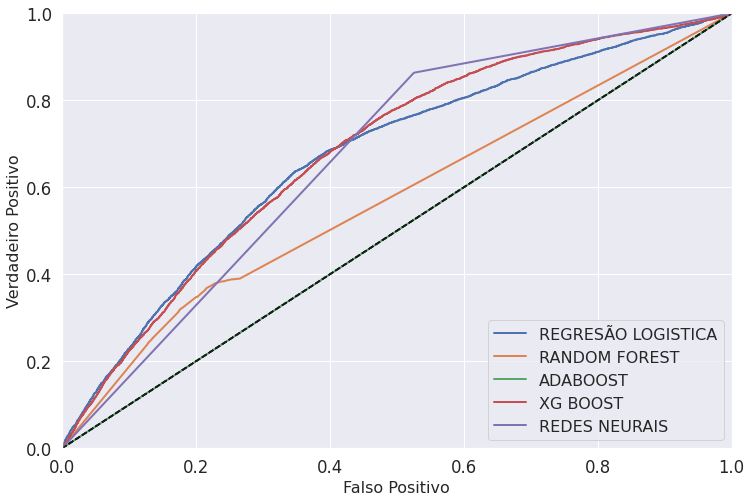

In [ ]:
plt.figure(figsize=(12, 8))
plot_roc_curve(fpr_logis, tpr_logis, "REGRESÃO LOGISTICA")
plot_roc_curve(fpr_random, tpr_random, "RANDOM FOREST")
#plot_roc_curve(fpr_extra, tpr_extra, "EXTRA TREES")
plot_roc_curve(fpr_ada, tpr_ada, "ADABOOST")
plot_roc_curve(fpr_xg_desb, tpr_xg_desb, "XG BOOST")
plot_roc_curve(fpr_tensor, tpr_tensor, "REDES NEURAIS")
plt.legend(loc="lower right", fontsize=16)